In [1]:
import os
import numpy as np
from ros_monitor import ROSTrajectoryVAE
from torch.autograd import Variable
from trajectory_loader import TrajectoryLoader
import matplotlib
import matplotlib.pyplot as plt
import argparse
from visual import TrajectoryVisualizer
import torch
import model_debugger

In [4]:
reload(model_debugger)

<module 'model_debugger' from 'model_debugger.pyc'>

In [5]:
model = 'rtt-star-beta-iterative-latent-5-b-max-small_v2'

In [6]:
def get_model_directory(model):
    return os.path.join('log', model)

In [41]:
def get_reconstruction_results(model, index):
    model_dir = get_model_directory(model)
    results_path = os.path.join(model_dir, 'reconstruction_results')
    results = os.listdir(results_path)
    results.sort()
    print(results[index])
    end_poses, pose_results, latents, trajectories, recons = np.load(os.path.join(results_path , results[index]))
    return end_poses, pose_results, latents, trajectories, recons

In [73]:
def average_norm(end_poses, pose_results):
    norms = np.linalg.norm(end_poses[:, :2] - pose_results[:, :2], axis=1)
    norms_mean = norms.mean()
    return norms_mean

In [195]:
LUMI_X_LIM = [0.3, 0.55]
LUMI_Y_LIM = [-0.4, 0.4]
LUMI_Z_LIM = [.1, .1]

def get_centers_indices(poses, steps, x_divide, y_divide):
    
    if (x_divide):
        X_C = np.linspace(LUMI_X_LIM[0], LUMI_X_LIM[1], 2 + steps)
    else:
        X_C = np.linspace(LUMI_X_LIM[0], LUMI_X_LIM[1], 2 + 1)
    
    X_C = X_C[1:-1]
    
    if (y_divide):
        Y_C = np.linspace(LUMI_Y_LIM[0], LUMI_Y_LIM[1], 2 + steps)
    else:
        Y_C = np.linspace(LUMI_Y_LIM[0], LUMI_Y_LIM[1], 2 + 1)
        
    Y_C = Y_C[1:-1]
    
    center_indices = []
    for y in Y_C:
        for x in X_C:
            center_indices.append(np.argmin(np.linalg.norm(poses[:, :2] - np.array((x, y)), axis=1)))    
    return np.array(center_indices)

In [201]:

def create_clusters(pose_results, latents, steps, x_divide=True, y_divide=True):

    indices = get_centers_indices(pose_results, steps, x_divide, y_divide)
    
    num_samples = latents.shape[0]
    
    center_dists = np.zeros((indices.shape[0], num_samples))
    
    for idx in range(indices.shape[0]):
        
        center_dists[idx] = np.linalg.norm(latents - latents[indices[idx]], axis=1)

    labels = np.argmin(center_dists, axis=0)

    plt.figure(figsize=(20, 20))

    for idx in range(indices.shape[0]):
        labeled_end_poses = pose_results[(labels == idx)]
        plt.scatter(labeled_end_poses[:,0], labeled_end_poses[:,1])
        
    title = "The number of clusters {}".format(indices.shape[0])
    
    if (x_divide):
        title += " x axis dividided"
        
    if (y_divide):
        title += " y axis dividided"
        
    plt.title(title)

In [222]:

def z_distribution(pose_results, end_poses):

    plt.figure(figsize=(20, 20))
    plt.hist(pose_results[:, 2], bins=100)
    plt.hist(end_poses[:, 2], bins=100)
        
    plt.legend(['Reconstructed', 'Original'])

In [145]:
# There is a bug when loading models.

model_dir = get_model_directory(model)
models_path = os.path.join(model_dir, 'models')
results = os.listdir(models_path)
results.sort()
results

['model_l_5_lr_0.001_iter_0.pth.tar',
 'model_l_5_lr_0.001_iter_1.pth.tar',
 'model_l_5_lr_0.001_iter_10.pth.tar',
 'model_l_5_lr_0.001_iter_11.pth.tar',
 'model_l_5_lr_0.001_iter_12.pth.tar',
 'model_l_5_lr_0.001_iter_2.pth.tar',
 'model_l_5_lr_0.001_iter_3.pth.tar',
 'model_l_5_lr_0.001_iter_4.pth.tar',
 'model_l_5_lr_0.001_iter_5.pth.tar',
 'model_l_5_lr_0.001_iter_6.pth.tar',
 'model_l_5_lr_0.001_iter_7.pth.tar',
 'model_l_5_lr_0.001_iter_8.pth.tar',
 'model_l_5_lr_0.001_iter_9.pth.tar']

In [88]:
end_poses, pose_results, latents, trajectories, recons = get_reconstruction_results(model, 0)
recons = np.array(recons)

reconstructions_model_0.pkl


In [28]:
print(end_poses.shape)
print(pose_results.shape)
print(latents.shape)
print(trajectories.shape)
print(recons.shape)

(8000, 3)
(8000, 3)
(8000, 5)
(8000, 7, 24)
(8000, 7, 24)


In [29]:
# 'model_l_5_lr_0.001_iter_0.pth.tar'

end_poses, pose_results, latents, trajectories, recons = get_reconstruction_results(model, 0)

0.019572268060140004

reconstructions_model_0.pkl
('Average Error', 0.015216238117439189)


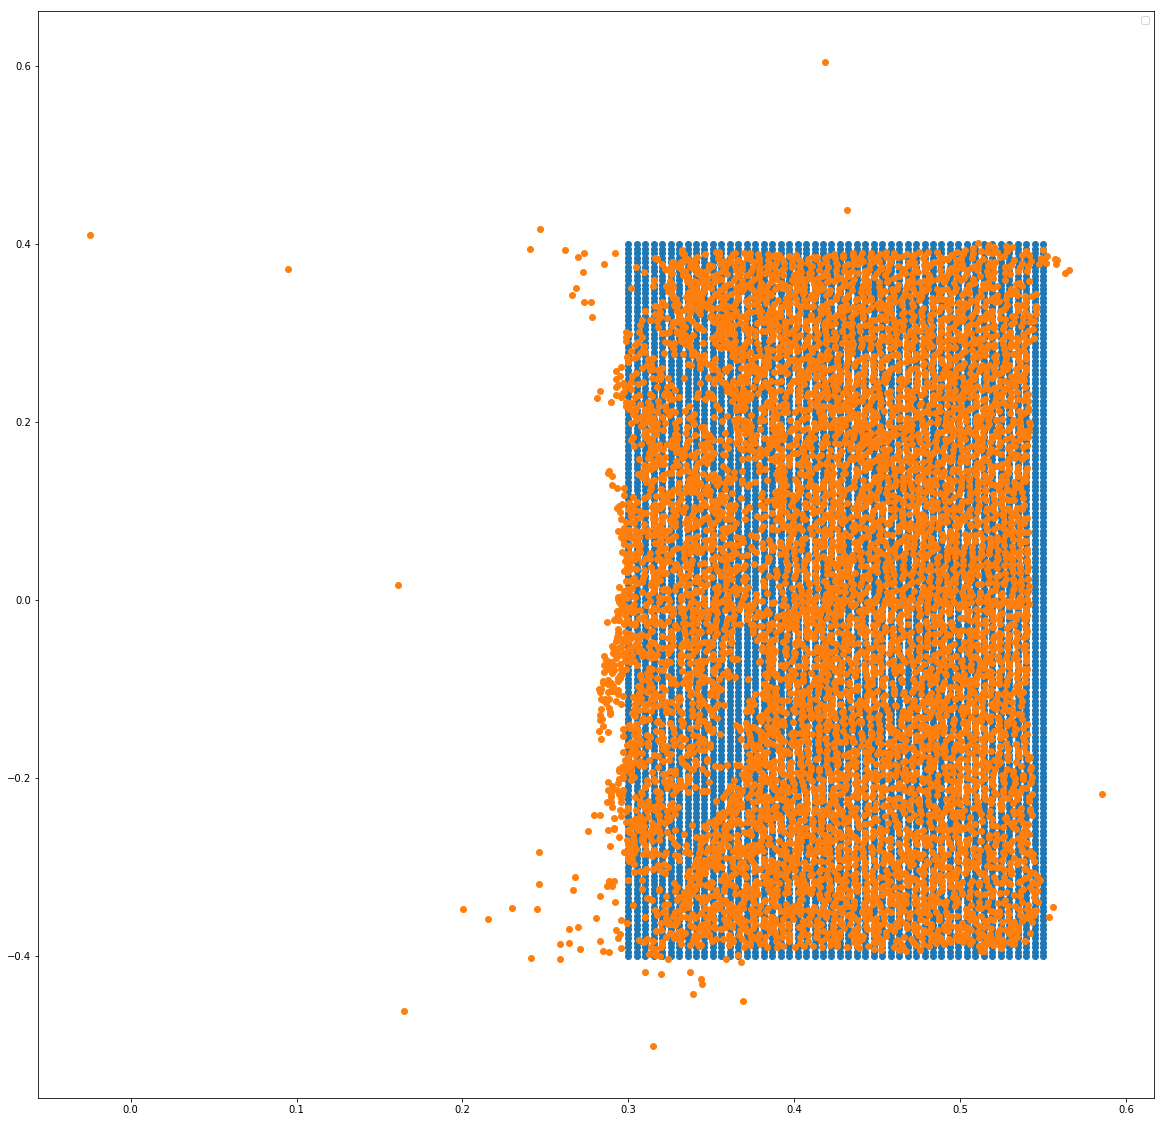

In [74]:
norms = np.linalg.norm(end_poses - pose_results, axis=1)
norms_mean = norms.mean()
print('Average Error', average_norm(end_poses, pose_results))

plt.figure(figsize=(20, 20))
plt.scatter(end_poses[:,0], end_poses[:,1])
plt.scatter(pose_results[:,0], pose_results[:,1])
plt.legend('Reconstructed', 'Original')

The number of elements in each cluster:
886
3229
8
3877
--


<Figure size 1440x1440 with 0 Axes>

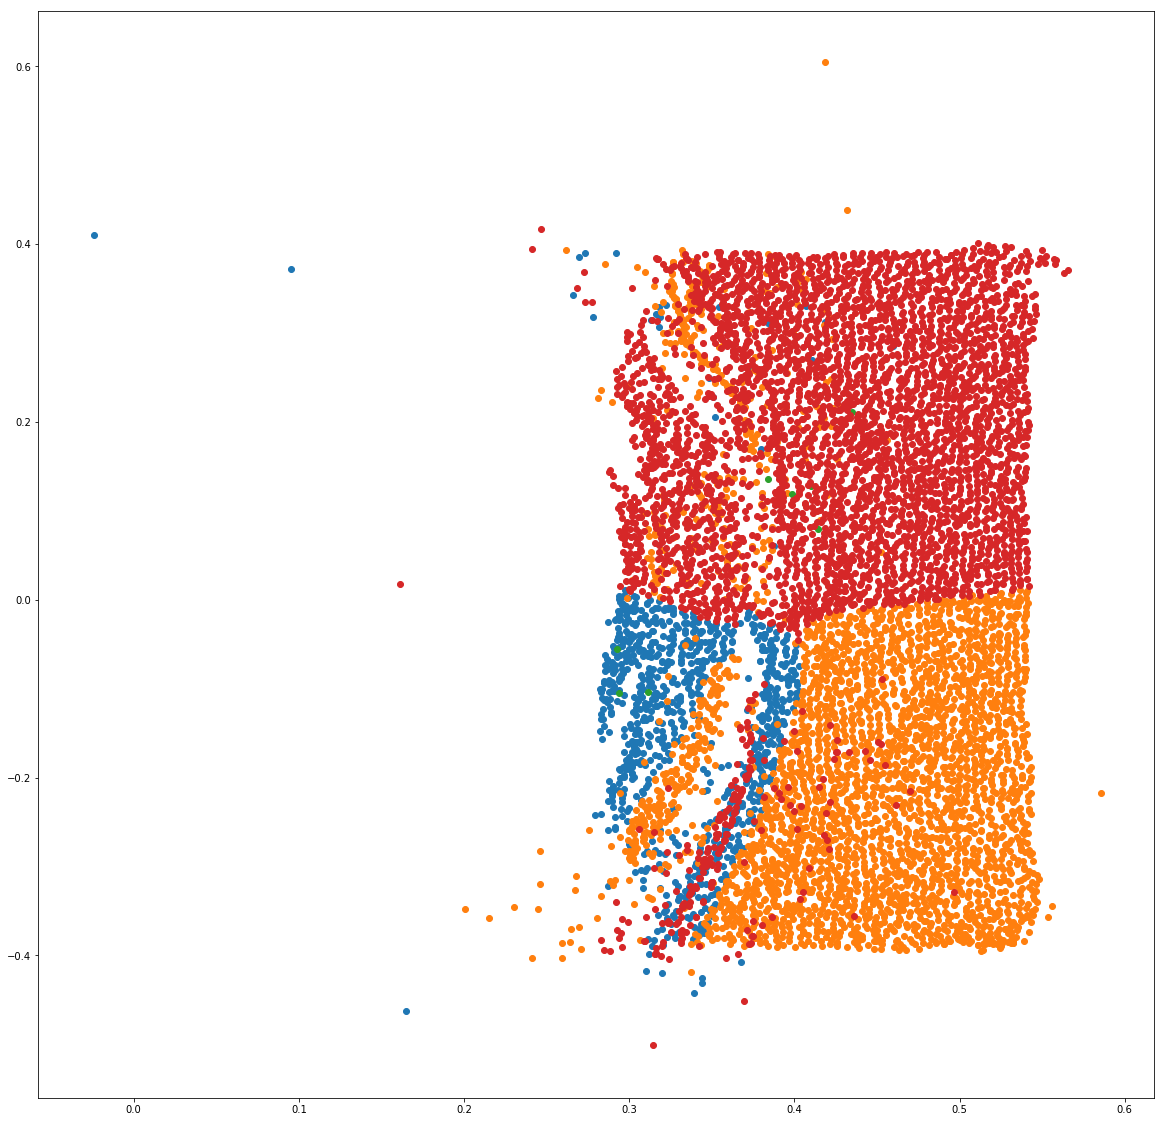

In [130]:
create_clusters(pose_results, latents)

reconstructions_model_1.pkl
('Average Error', 0.014756537712783608)


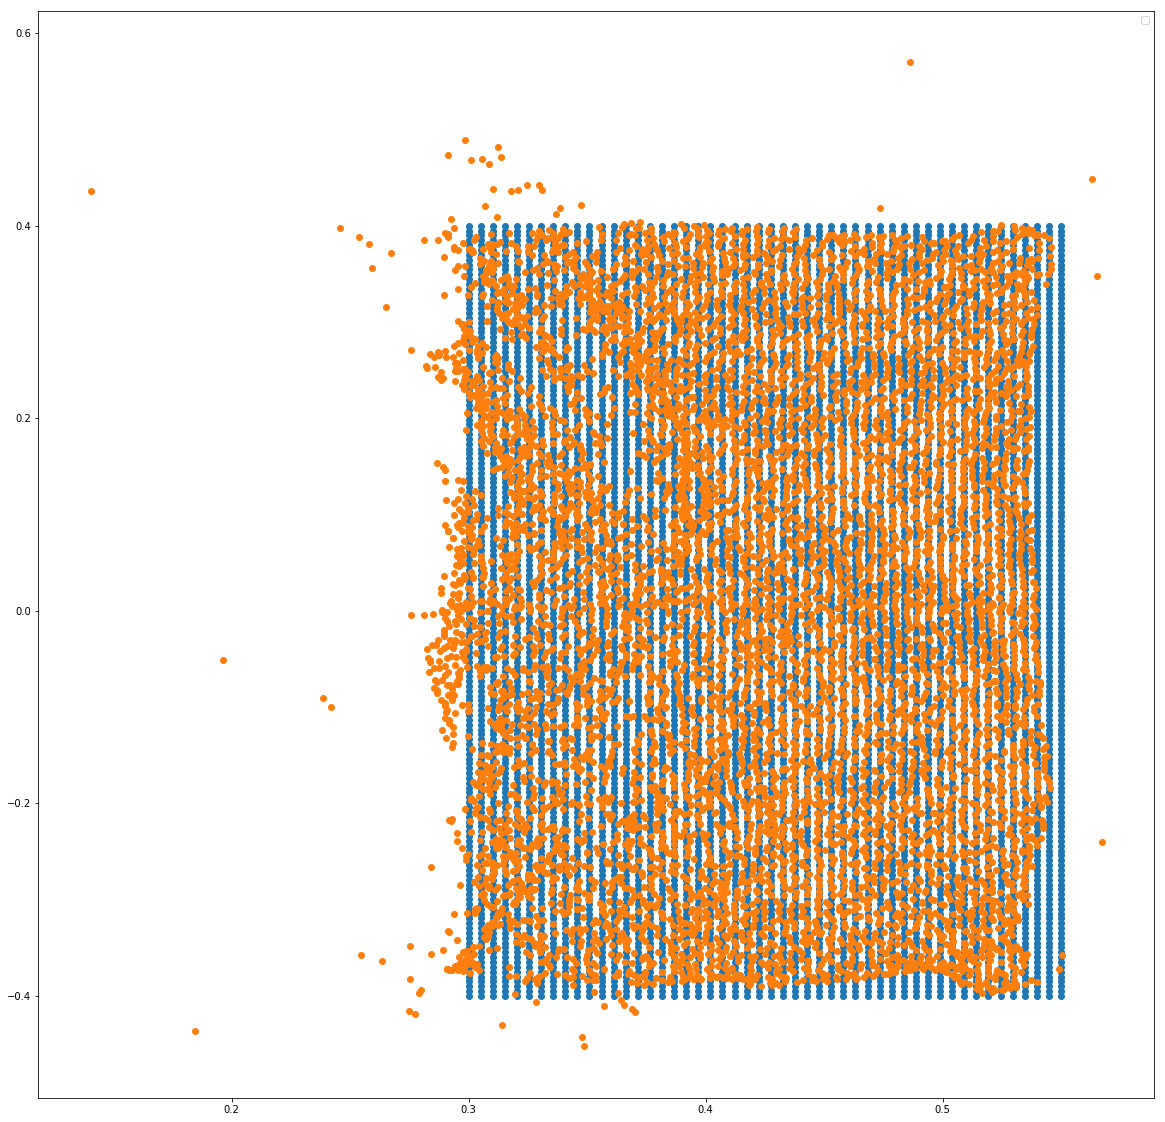

In [131]:
# 'model_l_5_lr_0.001_iter_1.pth.tar'

end_poses, pose_results, latents, trajectories, recons = get_reconstruction_results(model, 1)
recons = np.array(recons)

print('Average Error', average_norm(end_poses, pose_results))

plt.figure(figsize=(20, 20))
plt.scatter(end_poses[:,0], end_poses[:,1])
plt.scatter(pose_results[:,0], pose_results[:,1])
plt.legend('Reconstructed', 'Original')

The number of elements in each cluster:
835
3567
586
3012
--


<Figure size 1440x1440 with 0 Axes>

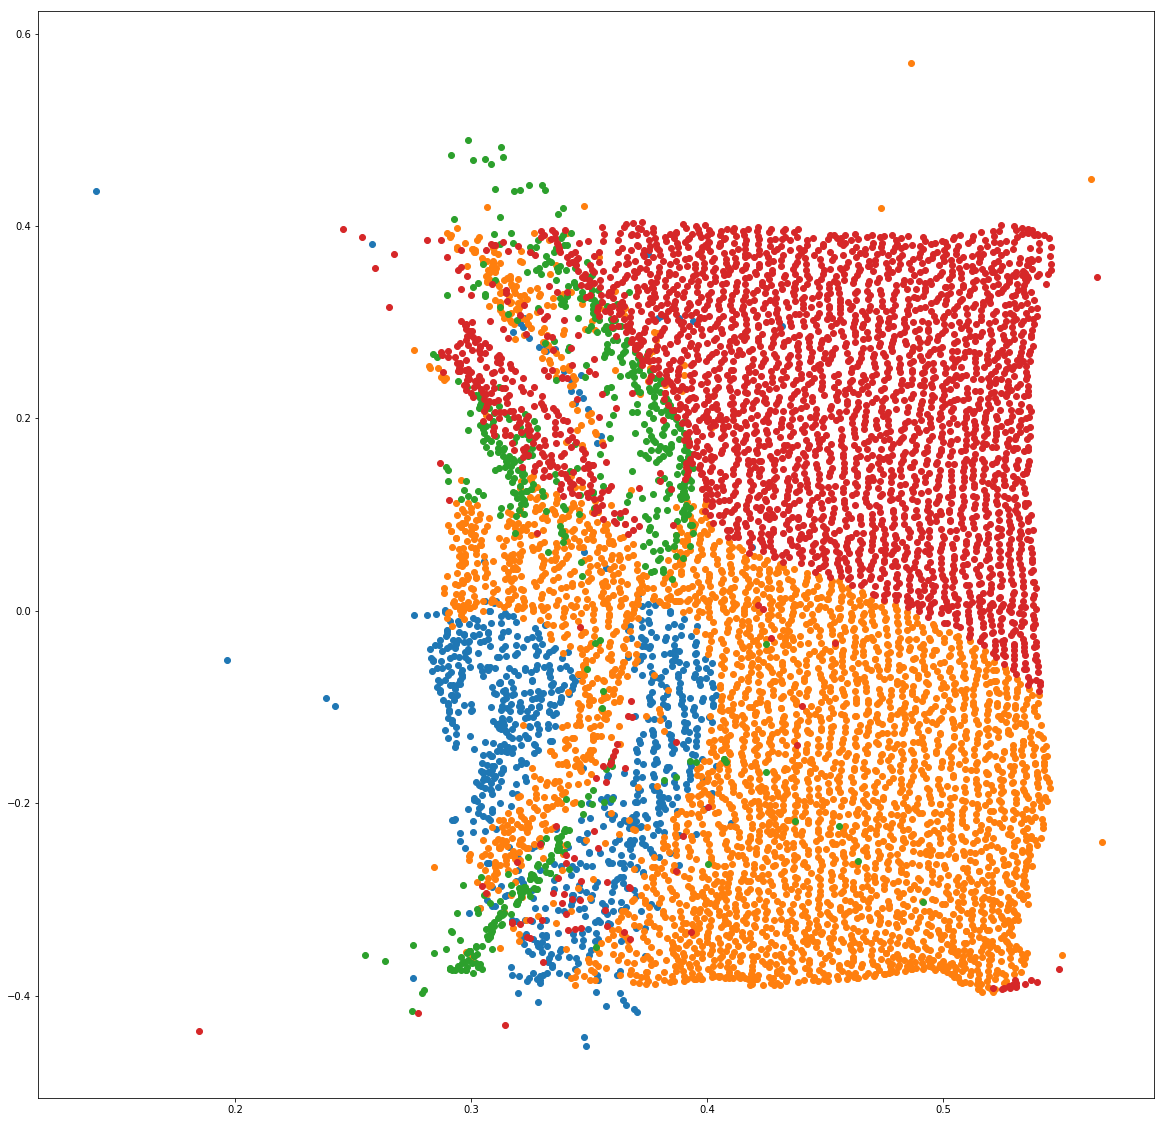

In [132]:
create_clusters(pose_results, latents)

reconstructions_model_2.pkl
('Average Error', 0.01283947066508478)


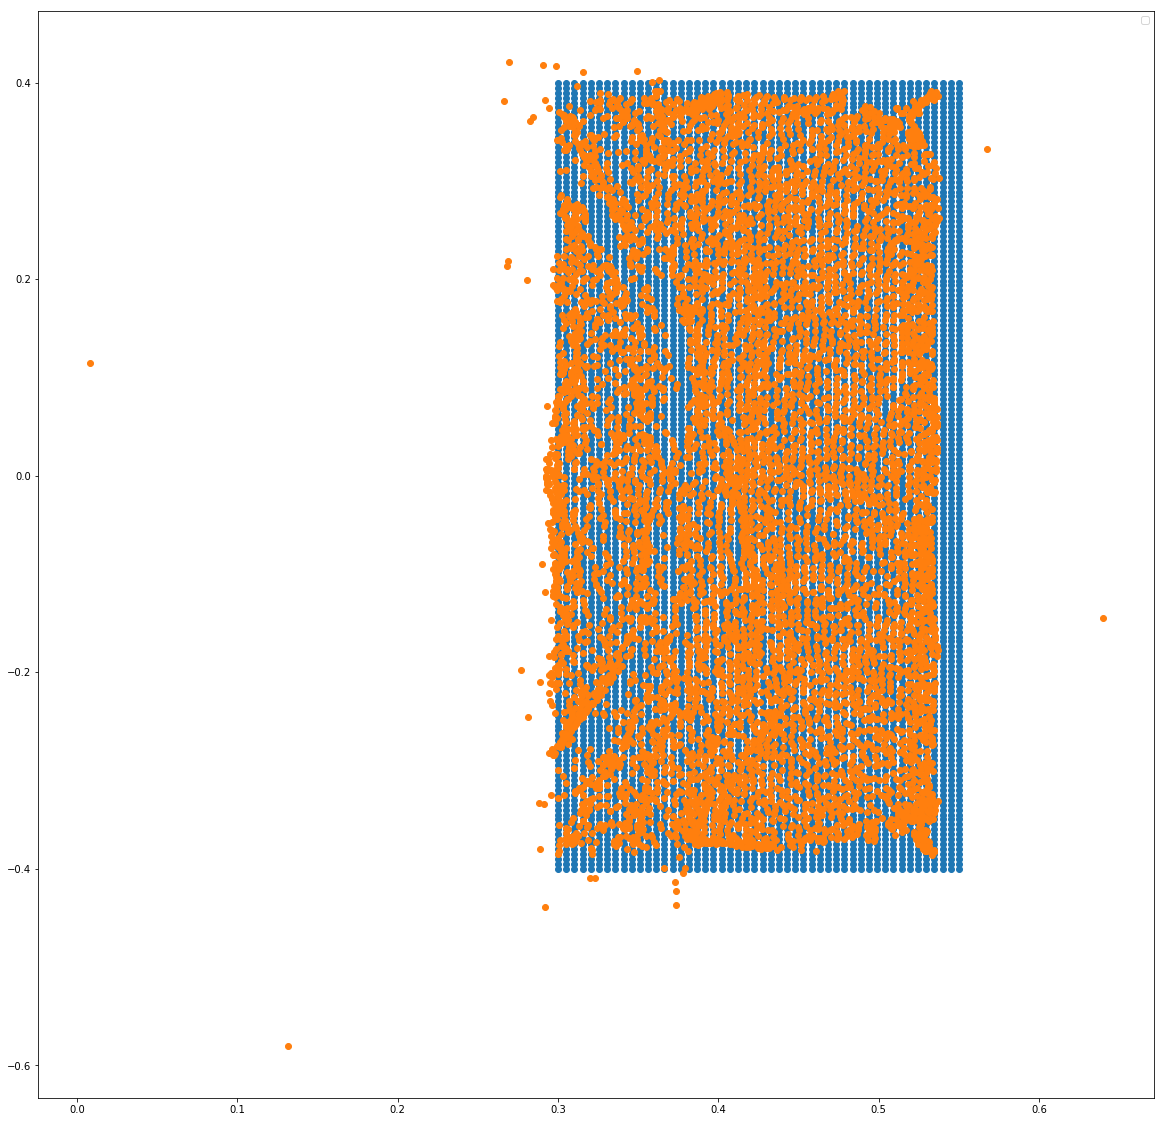

In [133]:
# 'model_l_5_lr_0.001_iter_10.pth.tar

end_poses, pose_results, latents, trajectories, recons = get_reconstruction_results(model, 2)
recons = np.array(recons)

print('Average Error', average_norm(end_poses, pose_results))

plt.figure(figsize=(20, 20))
plt.scatter(end_poses[:,0], end_poses[:,1])
plt.scatter(pose_results[:,0], pose_results[:,1])
plt.legend('Reconstructed', 'Original')

The number of elements in each cluster:
1216
3015
811
2958
--


<Figure size 1440x1440 with 0 Axes>

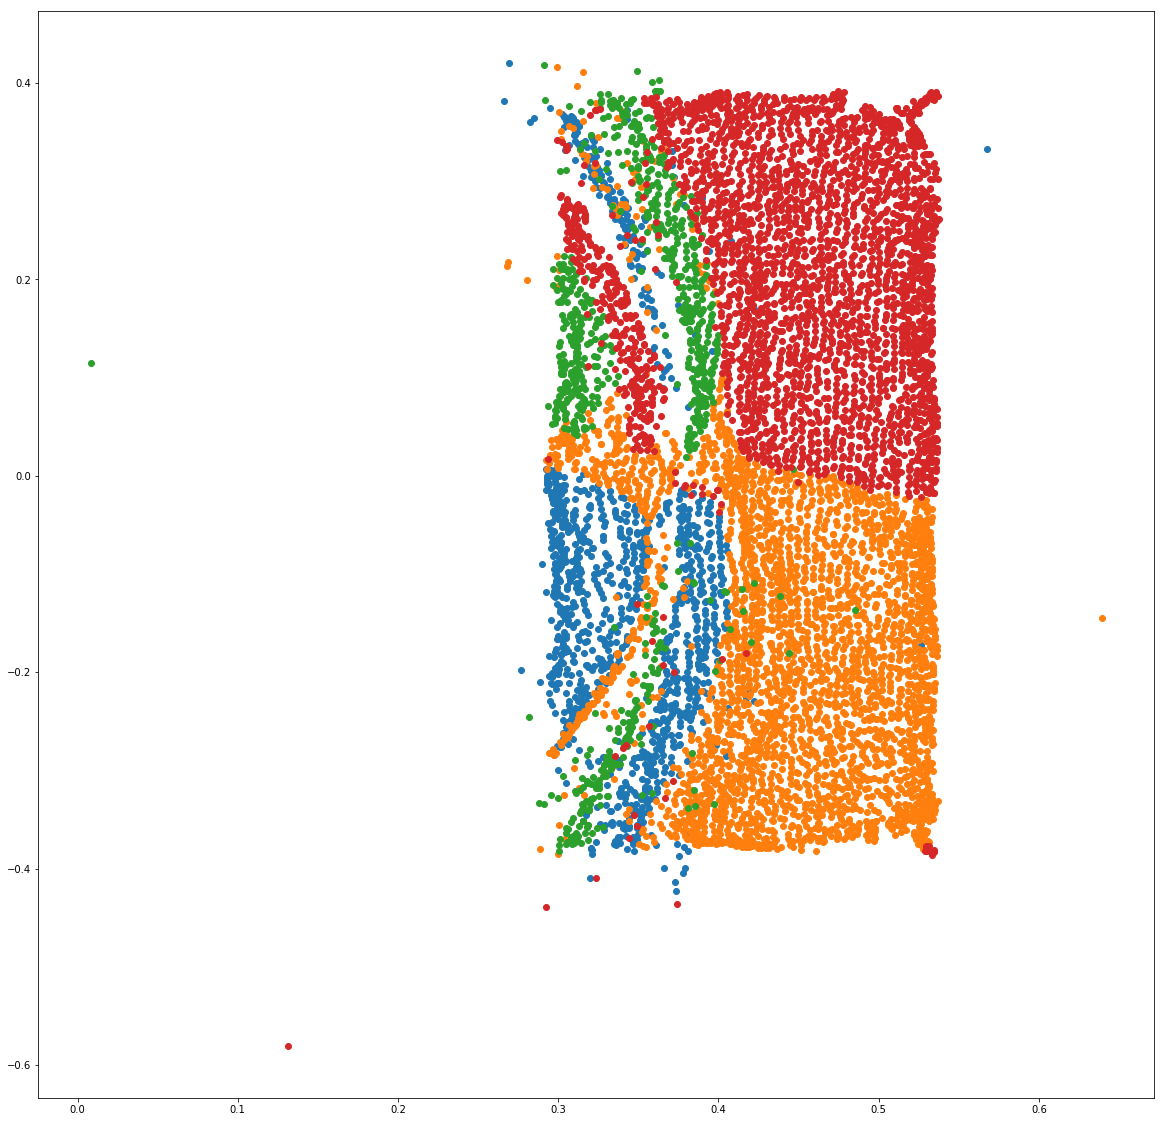

In [134]:
create_clusters(pose_results, latents)

reconstructions_model_3.pkl
('Average Error', 0.013088182020450928)


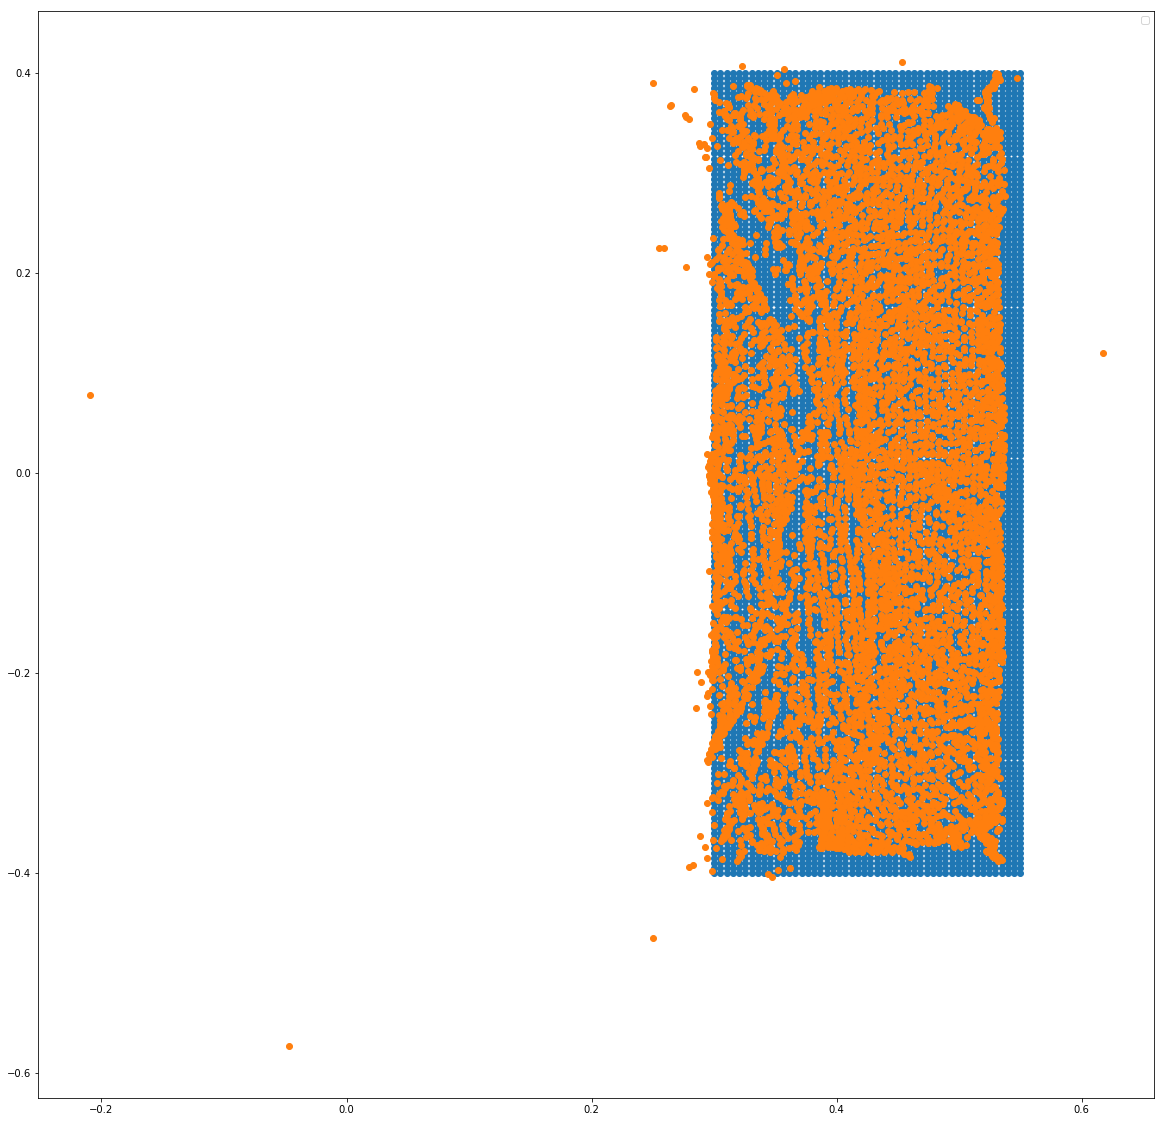

In [135]:
# 'model_l_5_lr_0.001_iter_11.pth.tar

end_poses, pose_results, latents, trajectories, recons = get_reconstruction_results(model, 3)
recons = np.array(recons)

print('Average Error', average_norm(end_poses, pose_results))

plt.figure(figsize=(20, 20))
plt.scatter(end_poses[:,0], end_poses[:,1])
plt.scatter(pose_results[:,0], pose_results[:,1])
plt.legend('Reconstructed', 'Original')

The number of elements in each cluster:
51
3582
1051
3316
--


<Figure size 1440x1440 with 0 Axes>

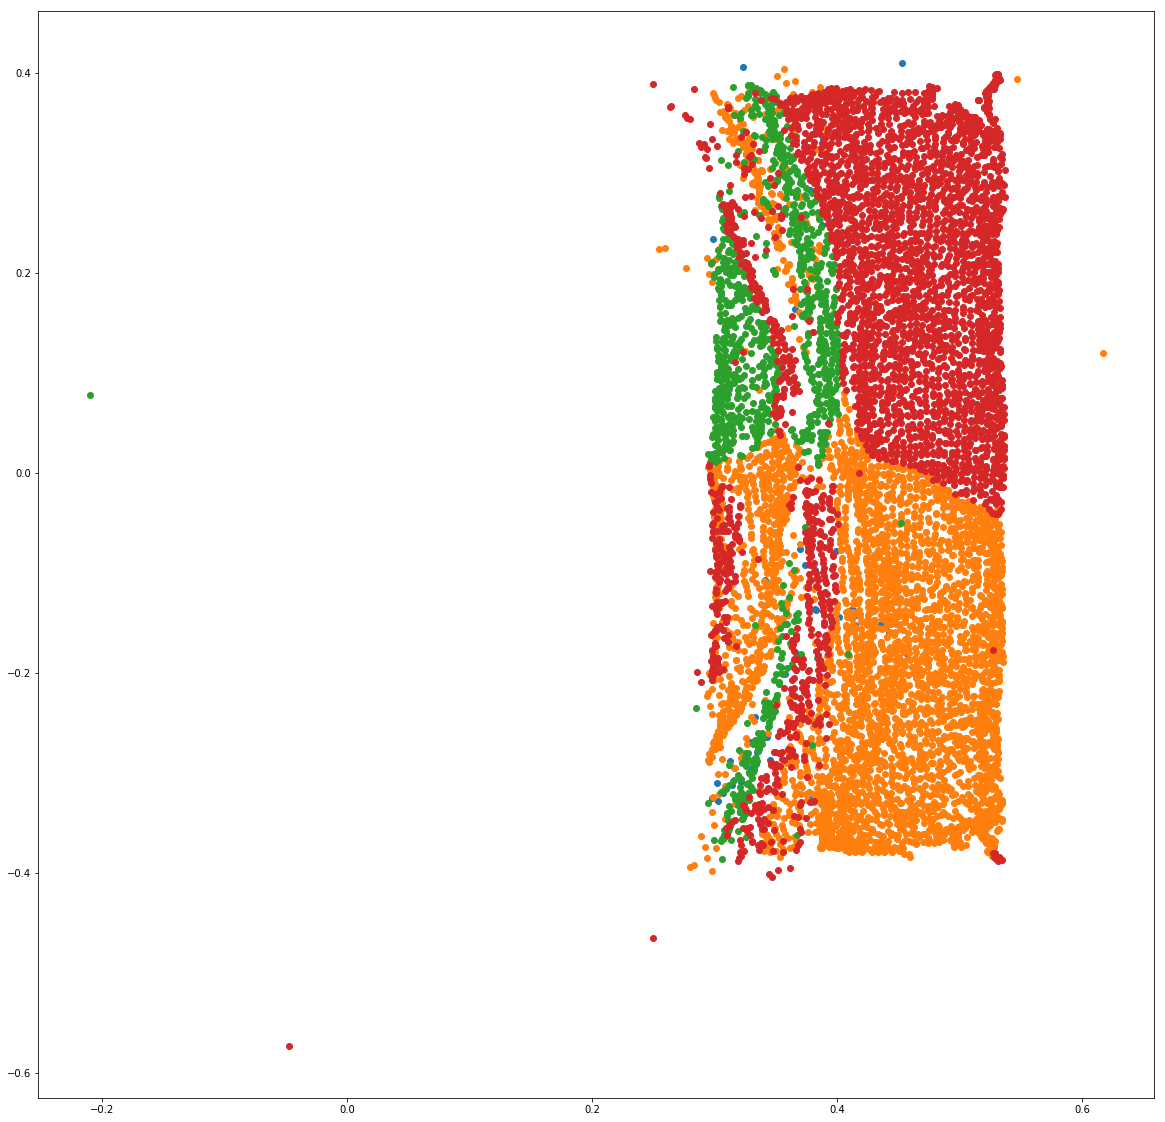

In [136]:
create_clusters(pose_results, latents)

reconstructions_model_4.pkl
('Average Error', 0.013119845315418871)


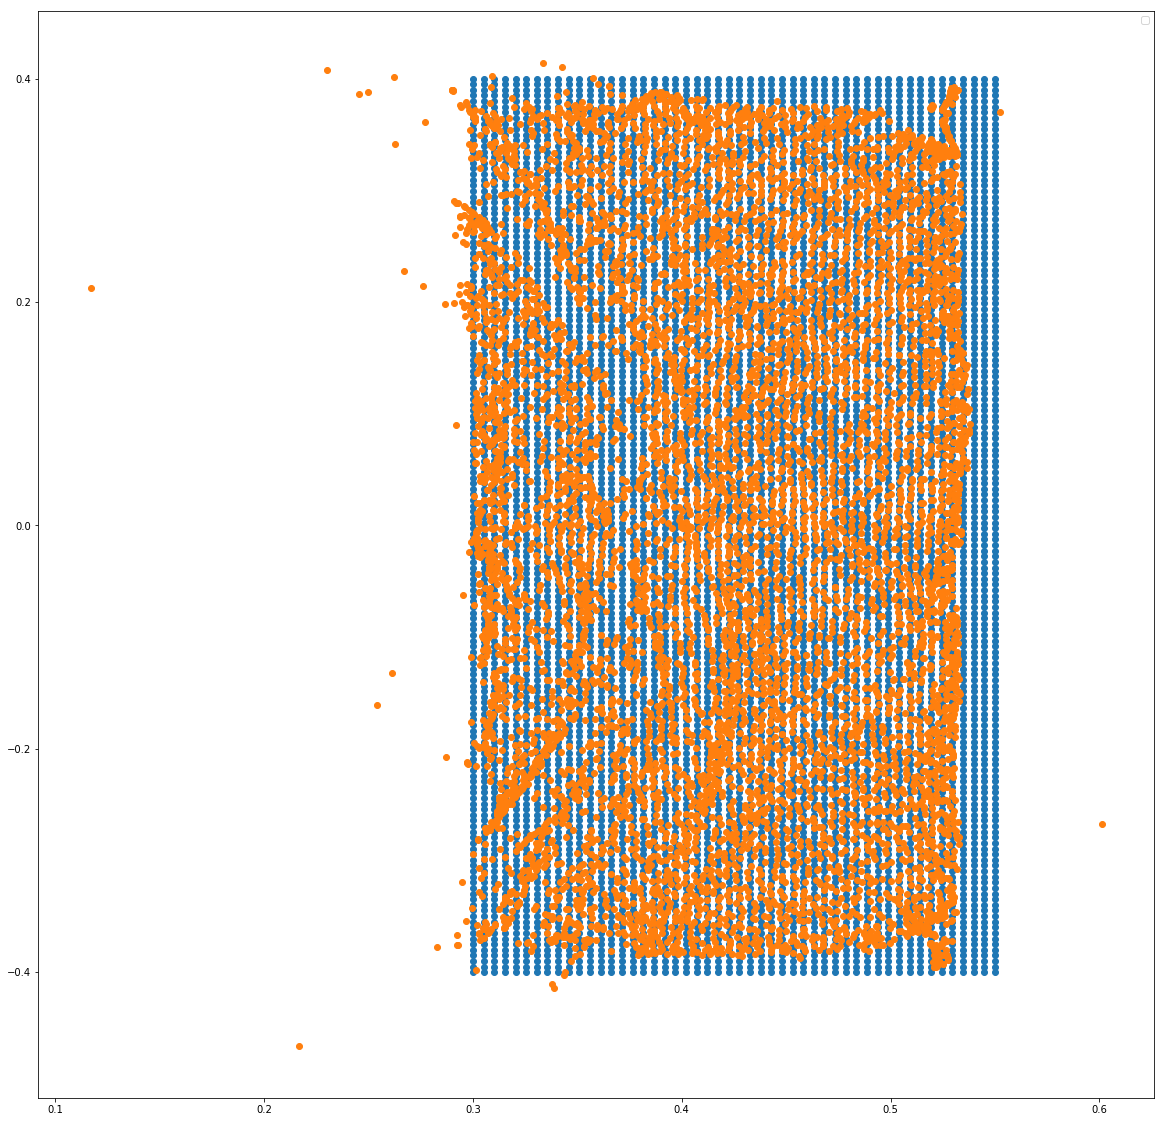

In [141]:
# model_l_5_lr_0.001_iter_12.pth.tar

end_poses, pose_results, latents, trajectories, recons = get_reconstruction_results(model, 4)
recons = np.array(recons)

print('Average Error', average_norm(end_poses, pose_results))

plt.figure(figsize=(20, 20))
plt.scatter(end_poses[:,0], end_poses[:,1])
plt.scatter(pose_results[:,0], pose_results[:,1])
plt.legend('Reconstructed', 'Original')

The number of elements in each cluster:
395
3638
703
3264
--


<Figure size 1440x1440 with 0 Axes>

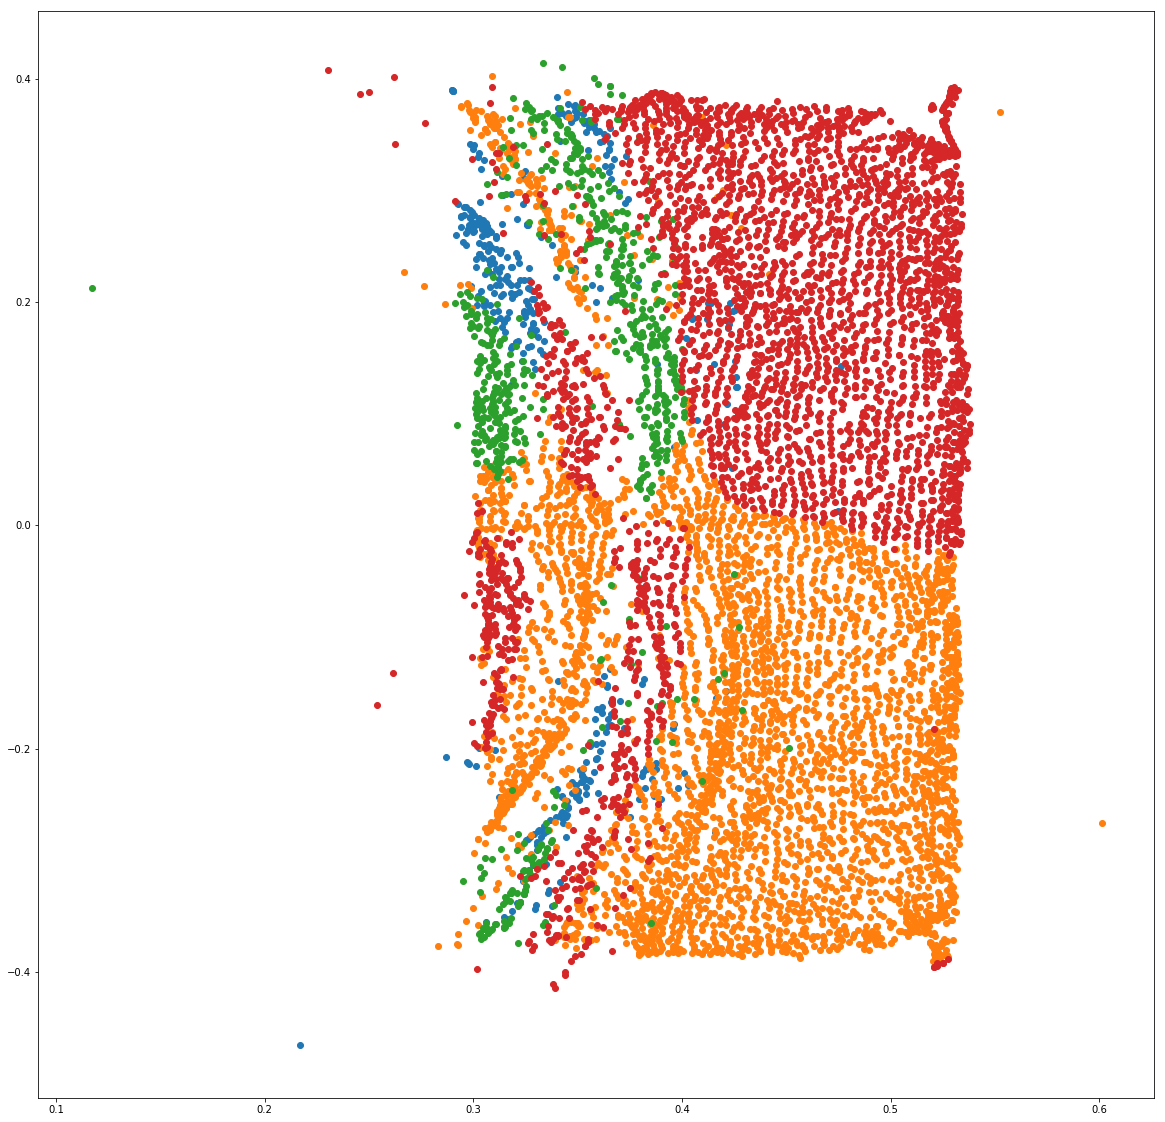

In [142]:
create_clusters(pose_results, latents)

reconstructions_model_5.pkl
('Average Error', 0.012773615186509026)


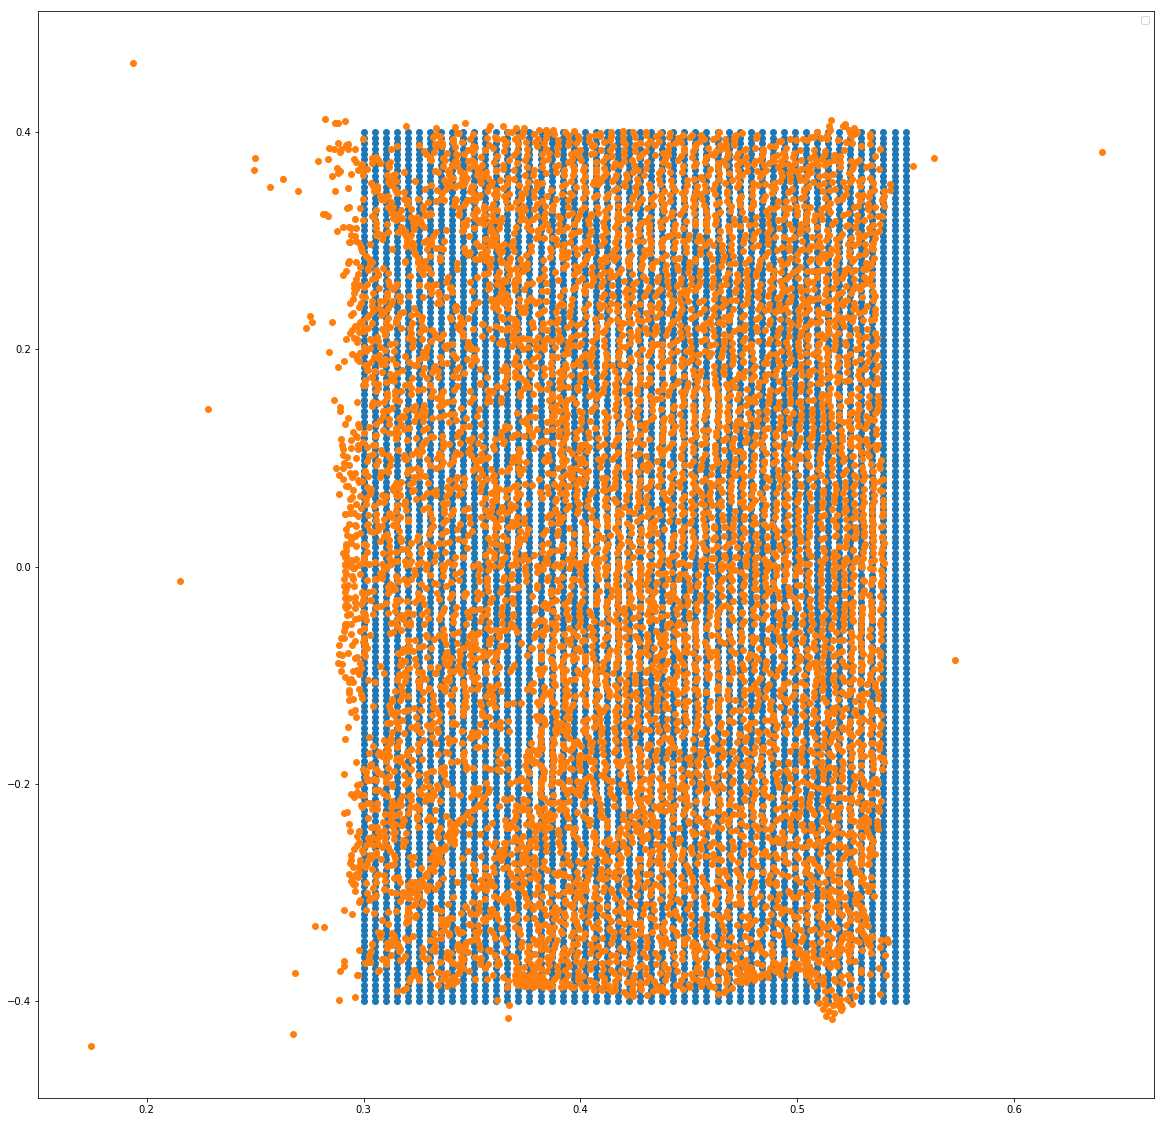

In [139]:
# model_l_5_lr_0.001_iter_2.pth.tar

end_poses, pose_results, latents, trajectories, recons = get_reconstruction_results(model, 5)
recons = np.array(recons)

print('Average Error', average_norm(end_poses, pose_results))

plt.figure(figsize=(20, 20))
plt.scatter(end_poses[:,0], end_poses[:,1])
plt.scatter(pose_results[:,0], pose_results[:,1])
plt.legend('Reconstructed', 'Original')

The number of elements in each cluster:
718
3588
795
2899
--


<Figure size 1440x1440 with 0 Axes>

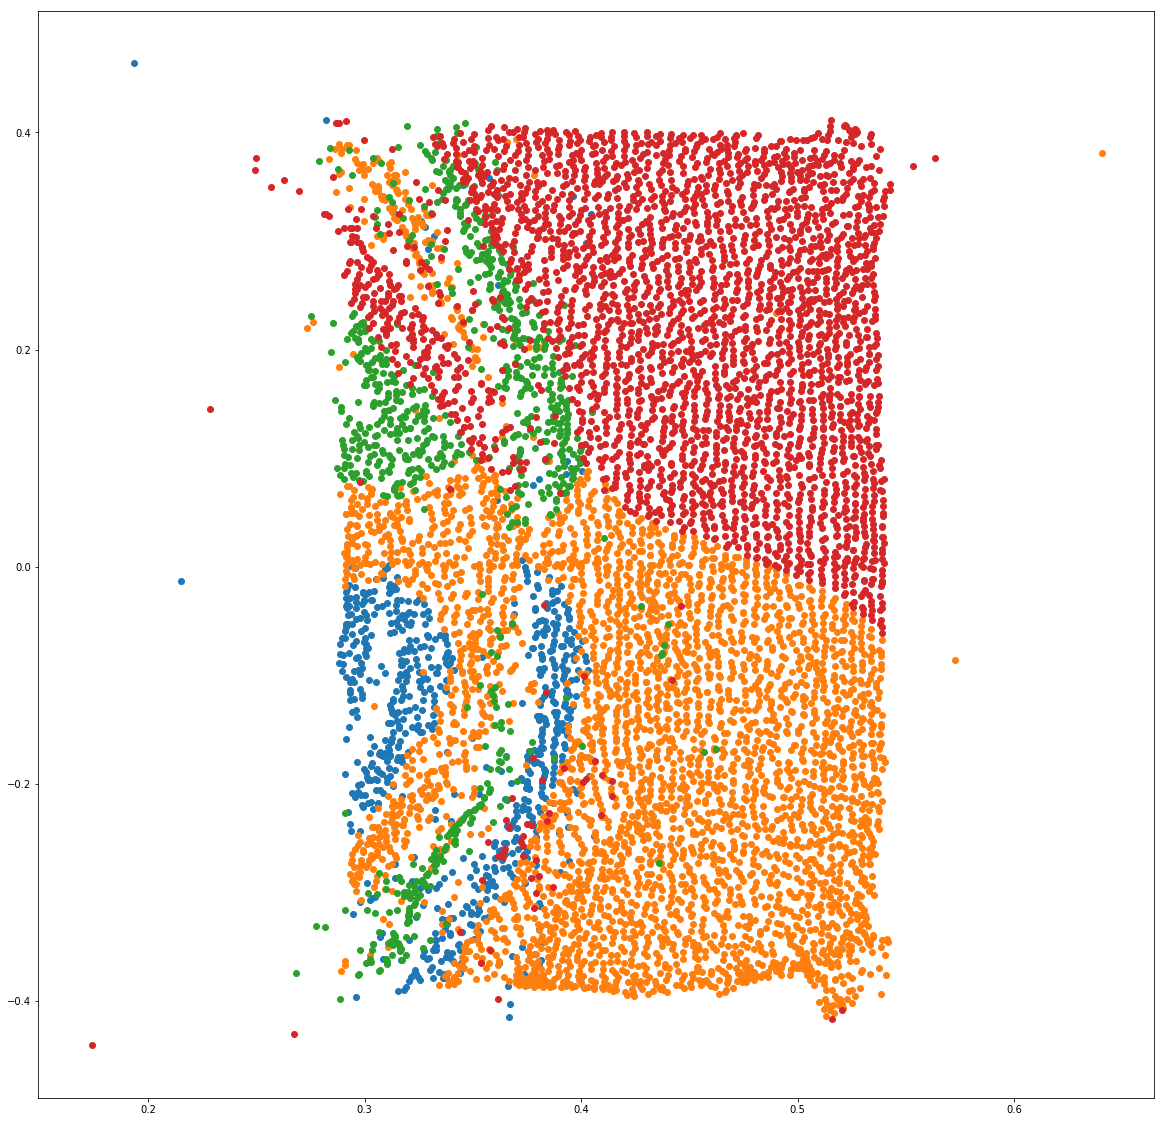

In [140]:
create_clusters(pose_results, latents)

In [146]:
model = 'rtt-star-beta-iterative-latent-5-b-max-small_v2'

# There is a bug when loading models.

model_dir = get_model_directory(model)
models_path = os.path.join(model_dir, 'models')
results = os.listdir(models_path)
results.sort()
results

['model_l_5_lr_0.001_iter_0.pth.tar',
 'model_l_5_lr_0.001_iter_1.pth.tar',
 'model_l_5_lr_0.001_iter_10.pth.tar',
 'model_l_5_lr_0.001_iter_11.pth.tar',
 'model_l_5_lr_0.001_iter_12.pth.tar',
 'model_l_5_lr_0.001_iter_2.pth.tar',
 'model_l_5_lr_0.001_iter_3.pth.tar',
 'model_l_5_lr_0.001_iter_4.pth.tar',
 'model_l_5_lr_0.001_iter_5.pth.tar',
 'model_l_5_lr_0.001_iter_6.pth.tar',
 'model_l_5_lr_0.001_iter_7.pth.tar',
 'model_l_5_lr_0.001_iter_8.pth.tar',
 'model_l_5_lr_0.001_iter_9.pth.tar']

reconstructions_model_0.pkl
('Average Error', 0.015216238117439189)


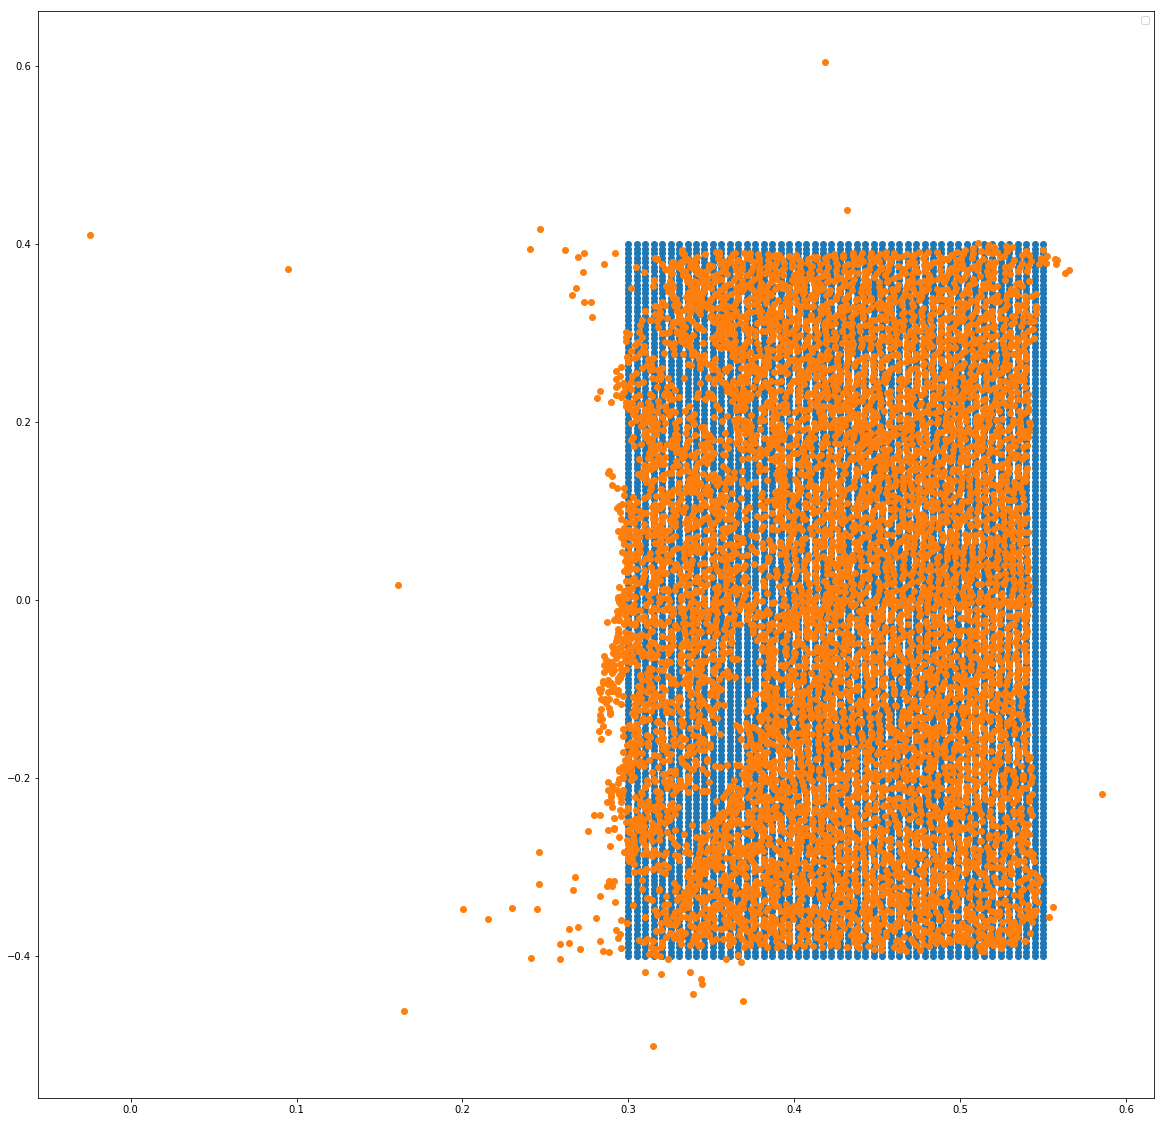

In [144]:
# 'model_l_5_lr_0.001_iter_0.pth.tar'

end_poses, pose_results, latents, trajectories, recons = get_reconstruction_results(model, 0)

print('Average Error', average_norm(end_poses, pose_results))


plt.figure(figsize=(20, 20))
plt.scatter(end_poses[:,0], end_poses[:,1])
plt.scatter(pose_results[:,0], pose_results[:,1])
plt.legend('Reconstructed', 'Original')

The number of elements in each cluster:
886
3229
8
3877
--


<Figure size 1440x1440 with 0 Axes>

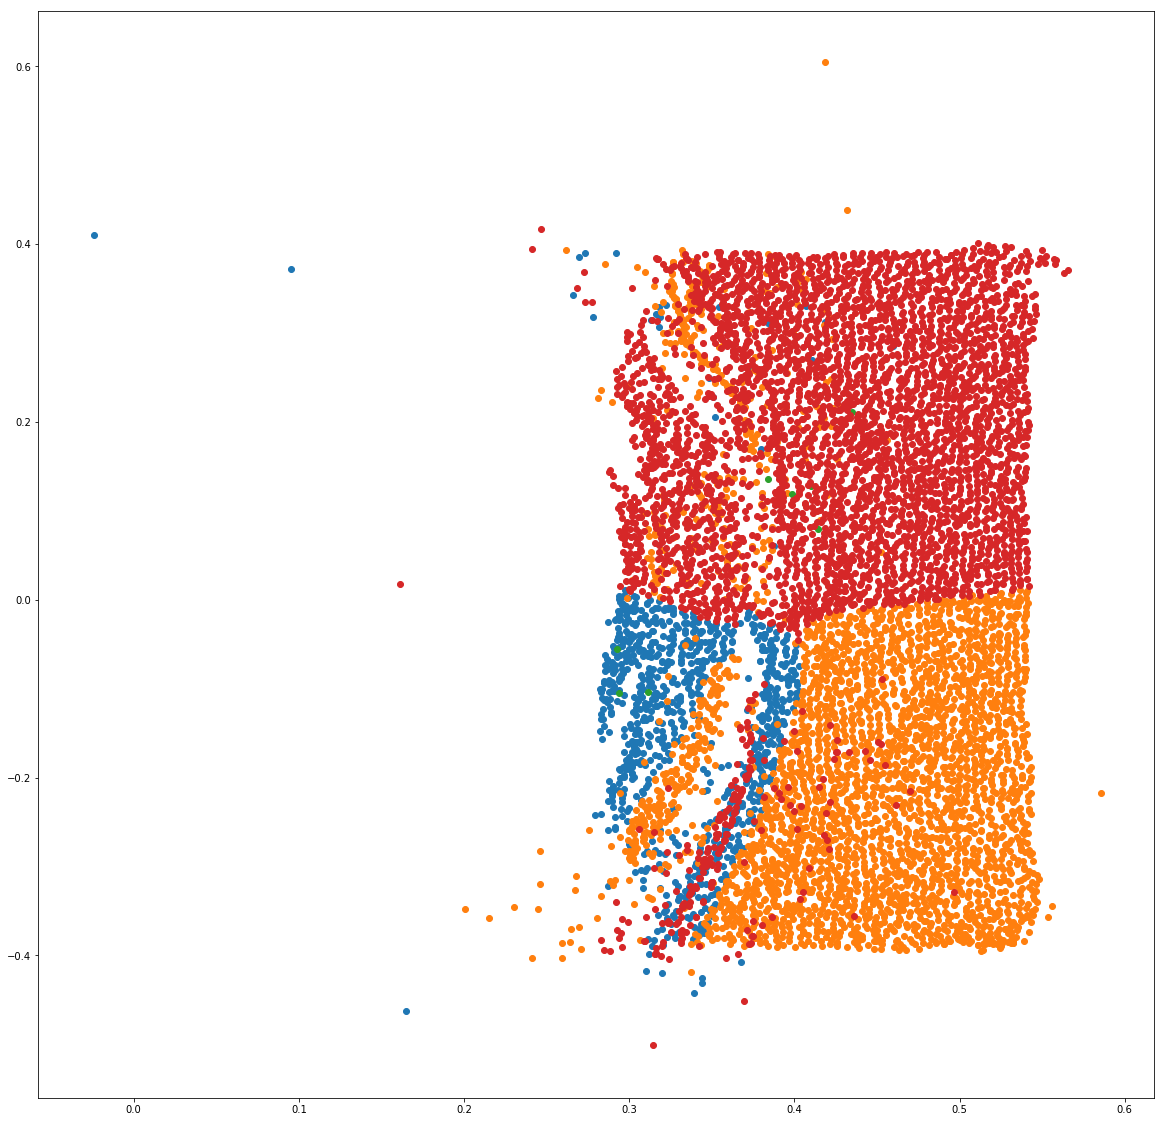

In [147]:
create_clusters(pose_results, latents)

reconstructions_model_1.pkl
('Average Error', 0.014756537712783608)


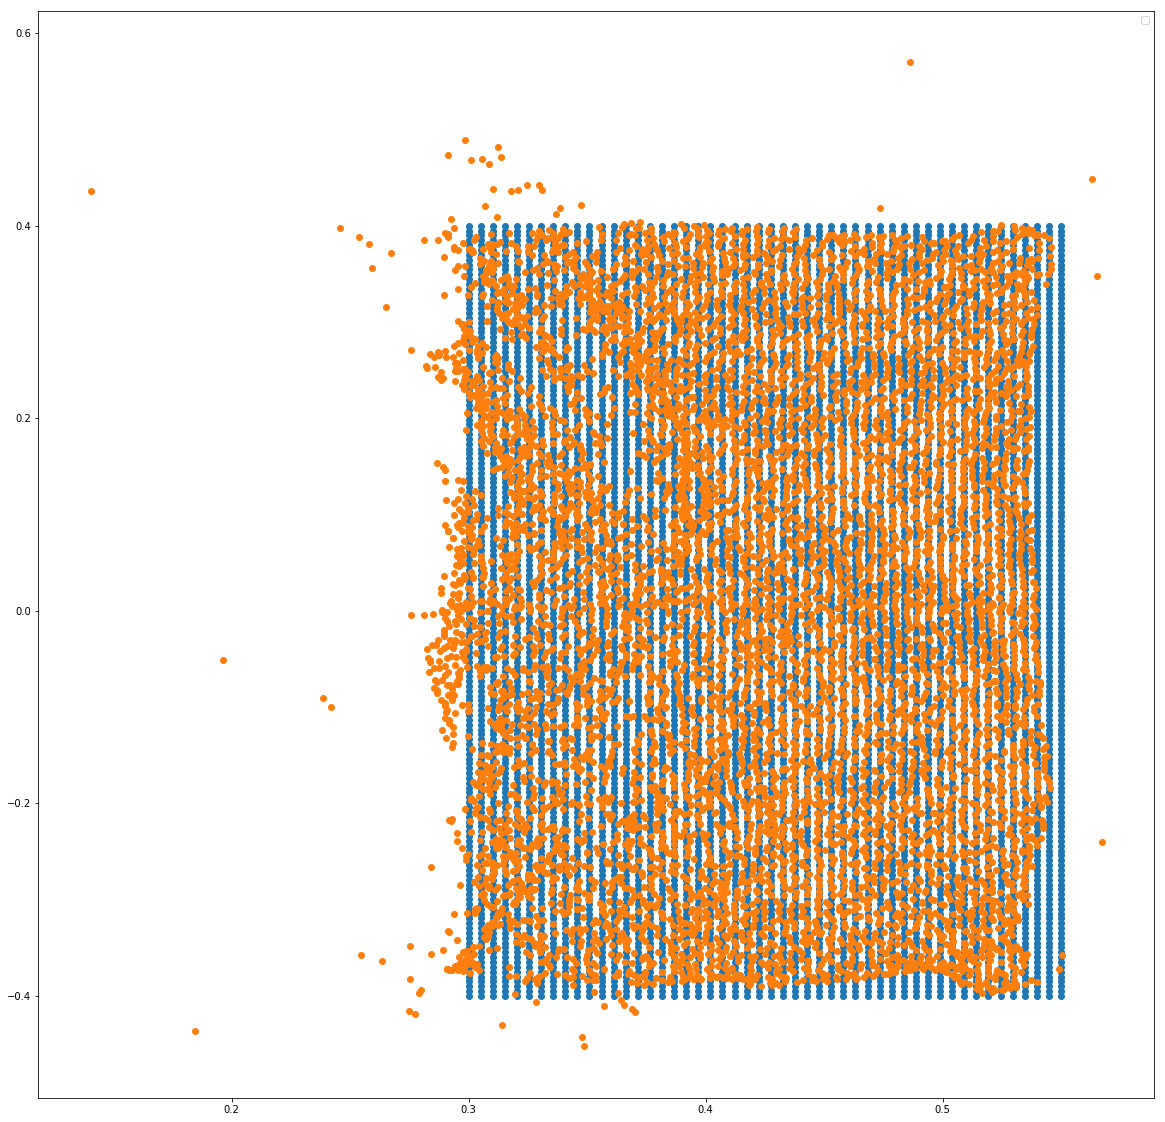

In [148]:
# 'model_l_5_lr_0.001_iter_0.pth.tar'

end_poses, pose_results, latents, trajectories, recons = get_reconstruction_results(model, 1)

print('Average Error', average_norm(end_poses, pose_results))

plt.figure(figsize=(20, 20))
plt.scatter(end_poses[:,0], end_poses[:,1])
plt.scatter(pose_results[:,0], pose_results[:,1])
plt.legend('Reconstructed', 'Original')

The number of elements in each cluster:
835
3567
586
3012
--


<Figure size 1440x1440 with 0 Axes>

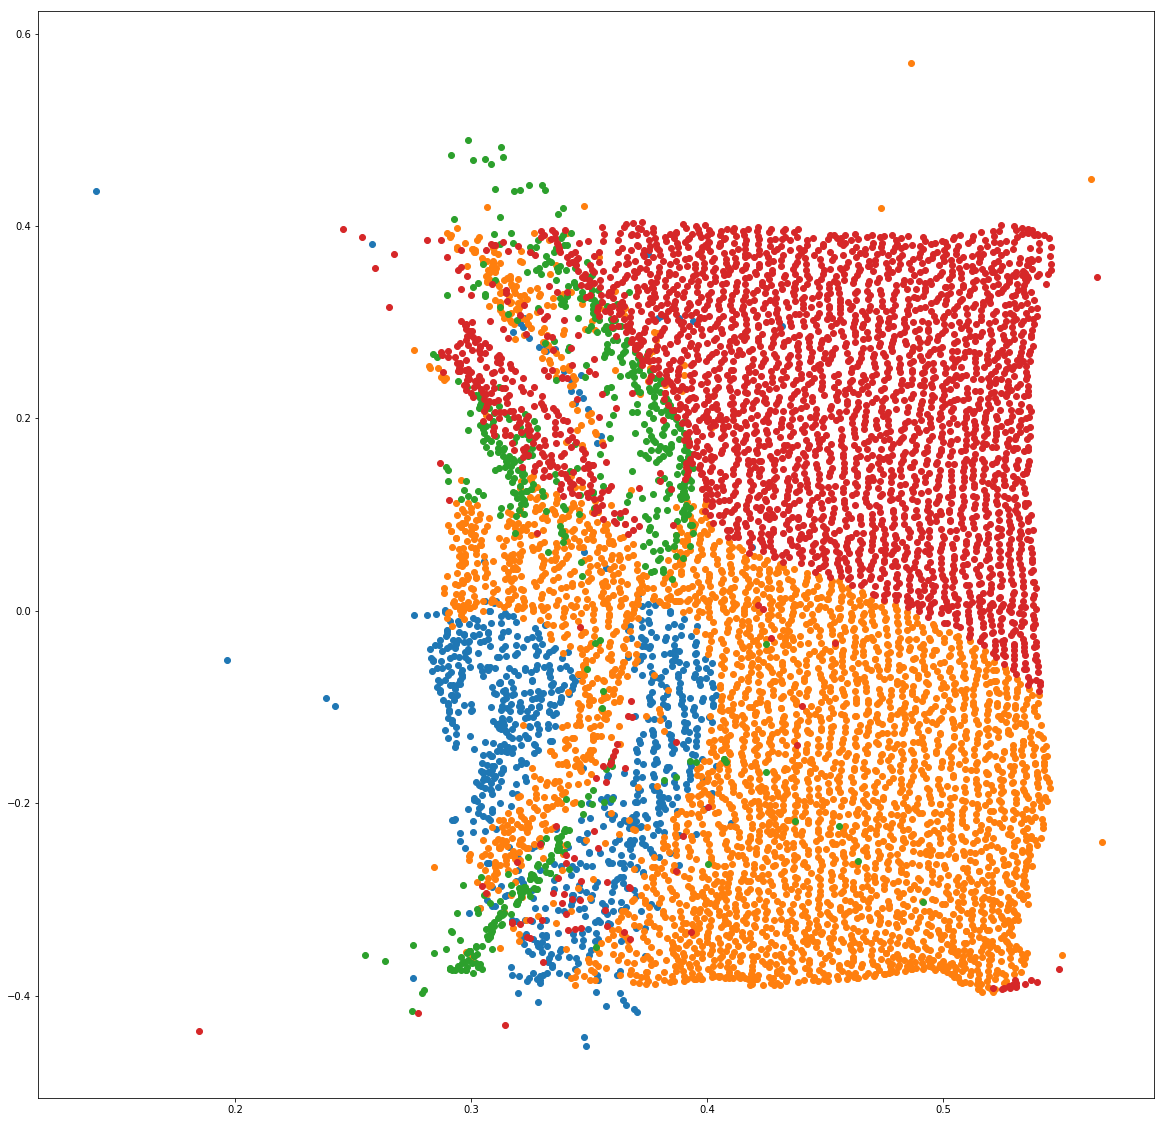

In [149]:
create_clusters(pose_results, latents)

reconstructions_model_2.pkl
('Average Error', 0.01283947066508478)


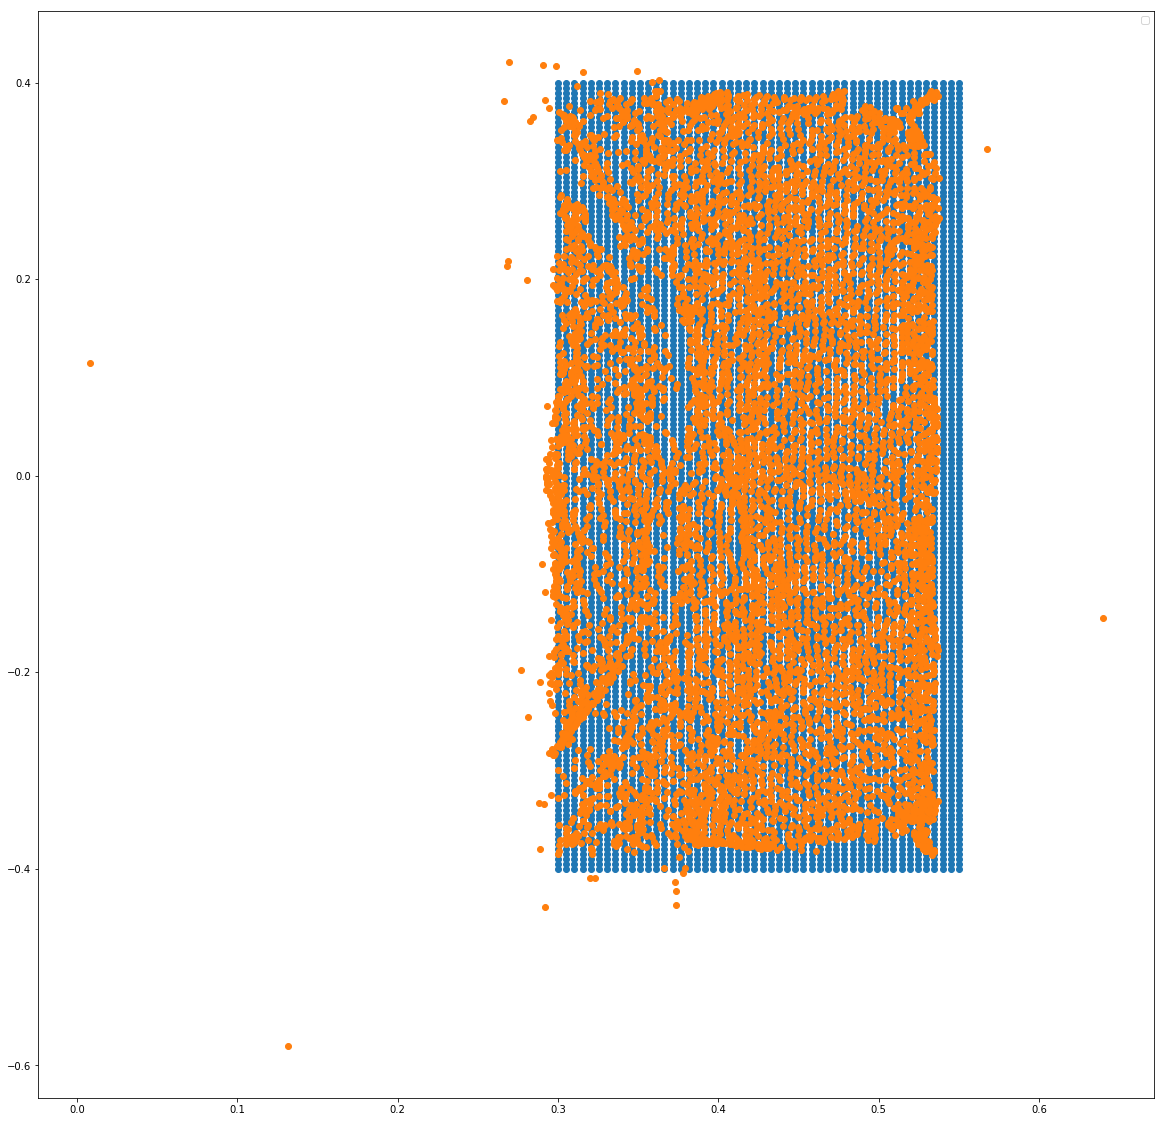

In [150]:
# 'model_l_5_lr_0.001_iter_0.pth.tar'

end_poses, pose_results, latents, trajectories, recons = get_reconstruction_results(model, 2)

print('Average Error', average_norm(end_poses, pose_results))

plt.figure(figsize=(20, 20))
plt.scatter(end_poses[:,0], end_poses[:,1])
plt.scatter(pose_results[:,0], pose_results[:,1])
plt.legend('Reconstructed', 'Original')

The number of elements in each cluster:
1216
3015
811
2958
--


<Figure size 1440x1440 with 0 Axes>

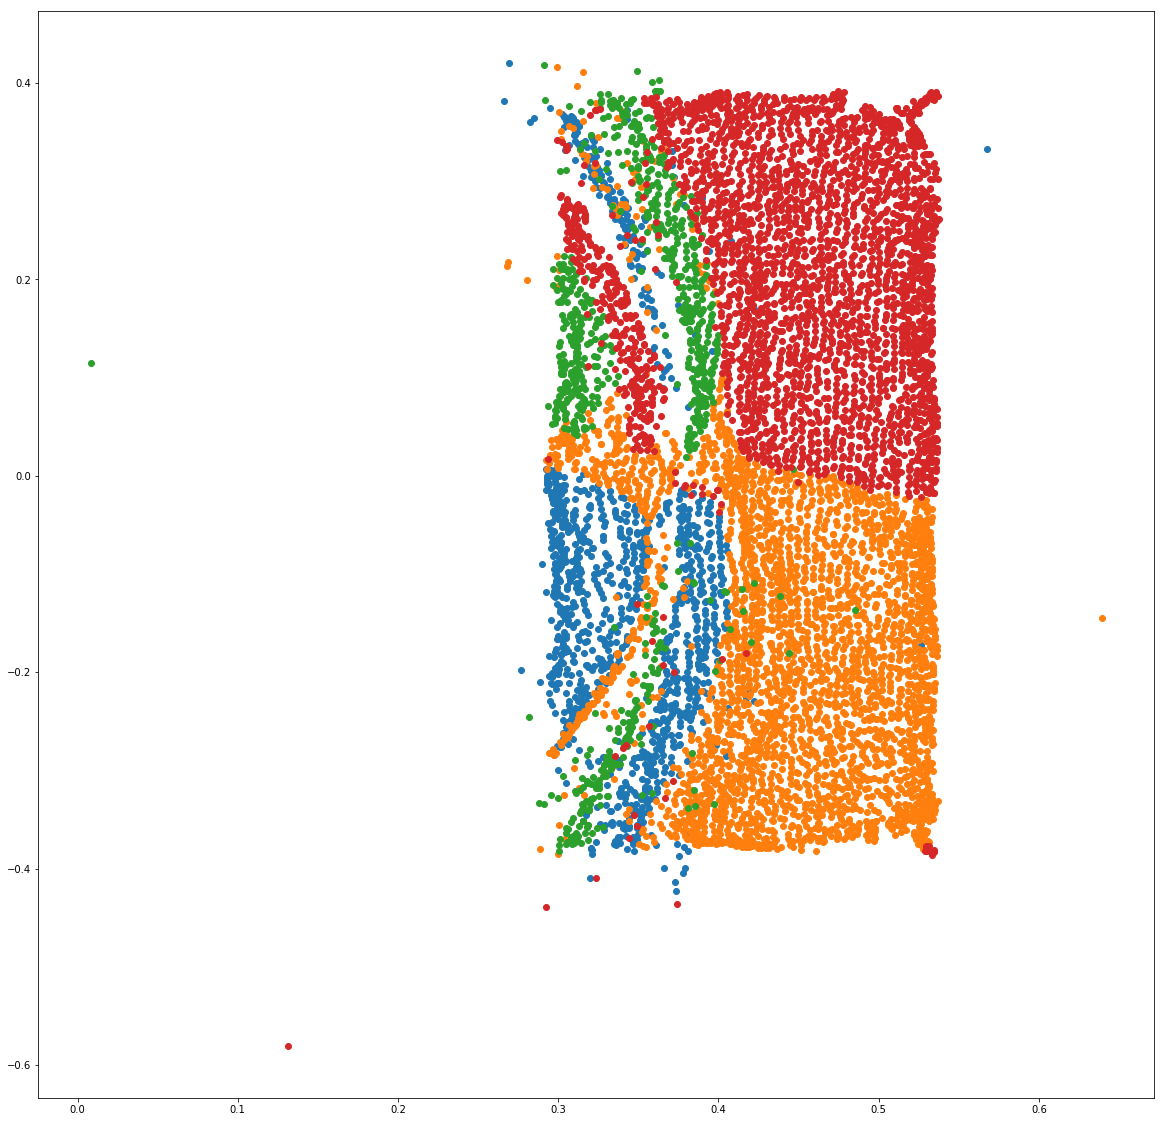

In [151]:
create_clusters(pose_results, latents)

reconstructions_model_3.pkl
('Average Error', 0.013088182020450928)


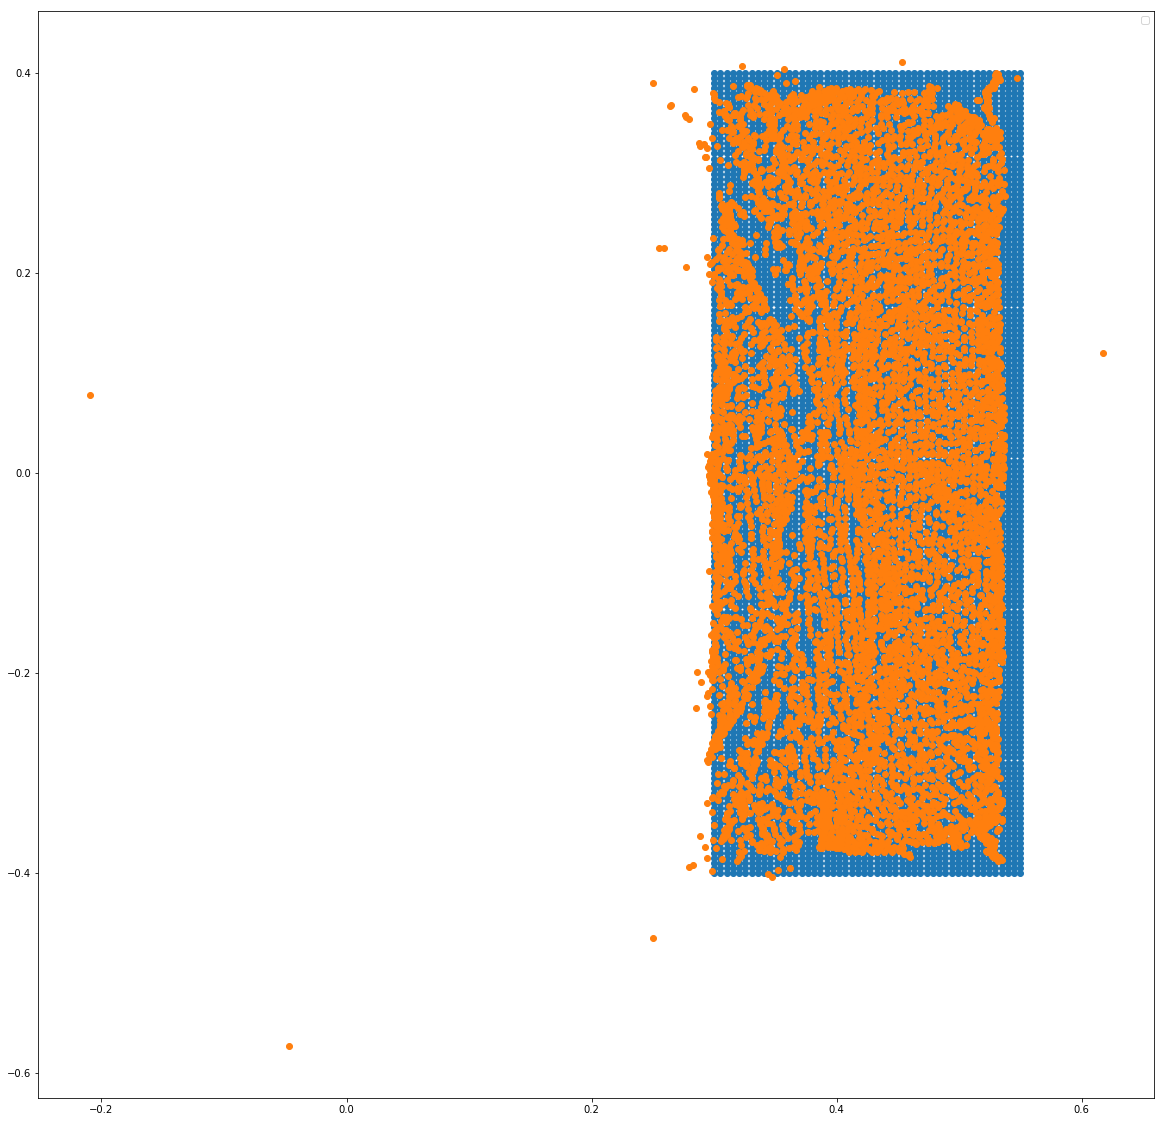

In [83]:
# 'model_l_5_lr_0.001_iter_0.pth.tar'

end_poses, pose_results, latents, trajectories, recons = get_reconstruction_results(model, 3)

print('Average Error', average_norm(end_poses, pose_results))

plt.figure(figsize=(20, 20))
plt.scatter(end_poses[:,0], end_poses[:,1])
plt.scatter(pose_results[:,0], pose_results[:,1])
plt.legend('Reconstructed', 'Original')

The number of elements in each cluster:
1216
3015
811
2958
--


<Figure size 1440x1440 with 0 Axes>

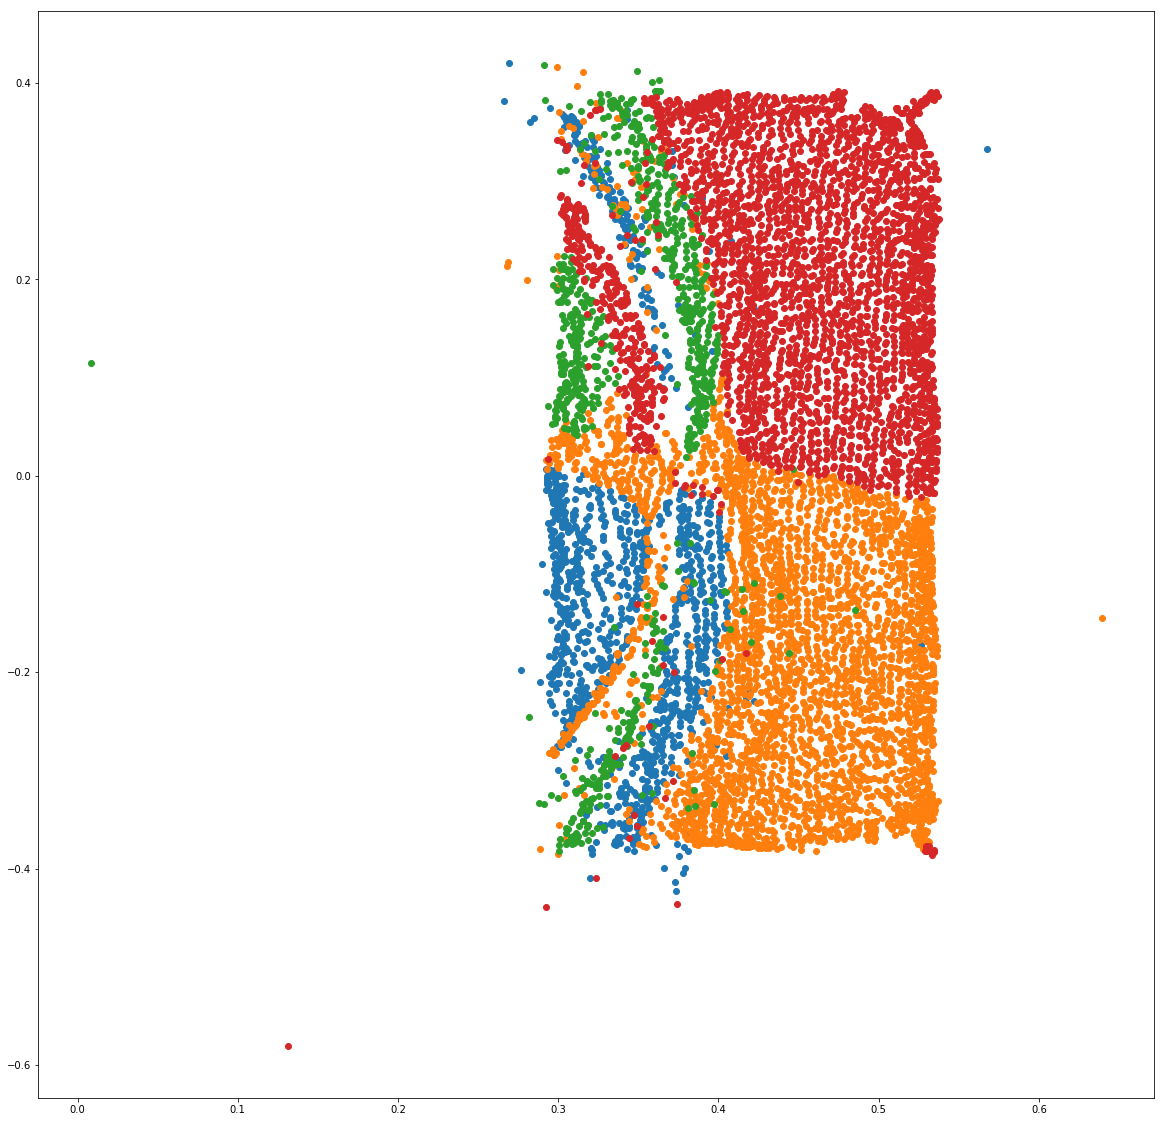

In [152]:
create_clusters(pose_results, latents)

reconstructions_model_4.pkl
('Average Error', 0.018471398705980895)


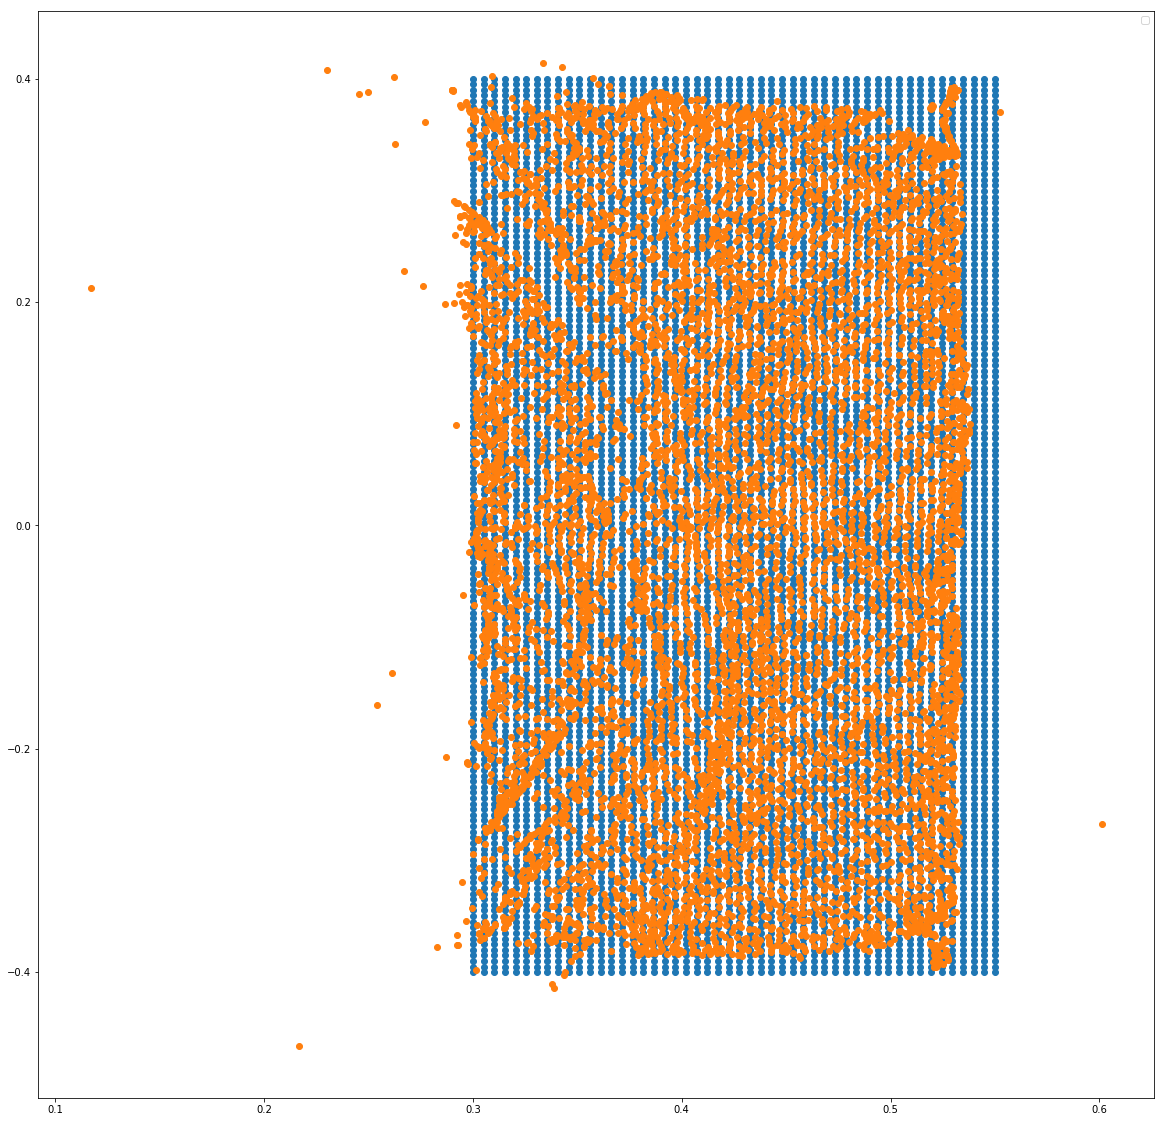

In [153]:
# 'model_l_5_lr_0.001_iter_0.pth.tar'

end_poses, pose_results, latents, trajectories, recons = get_reconstruction_results(model, 4)

norms = np.linalg.norm(end_poses - pose_results, axis=1)
norms_mean = norms.mean()
print('Average Error', norms_mean)

plt.figure(figsize=(20, 20))
plt.scatter(end_poses[:,0], end_poses[:,1])
plt.scatter(pose_results[:,0], pose_results[:,1])
plt.legend('Reconstructed', 'Original')

In [197]:
create_clusters(pose_results, latents)

TypeError: create_clusters() takes at least 3 arguments (2 given)

reconstructions_model_5.pkl
('Average Error', 0.015622388608589034)


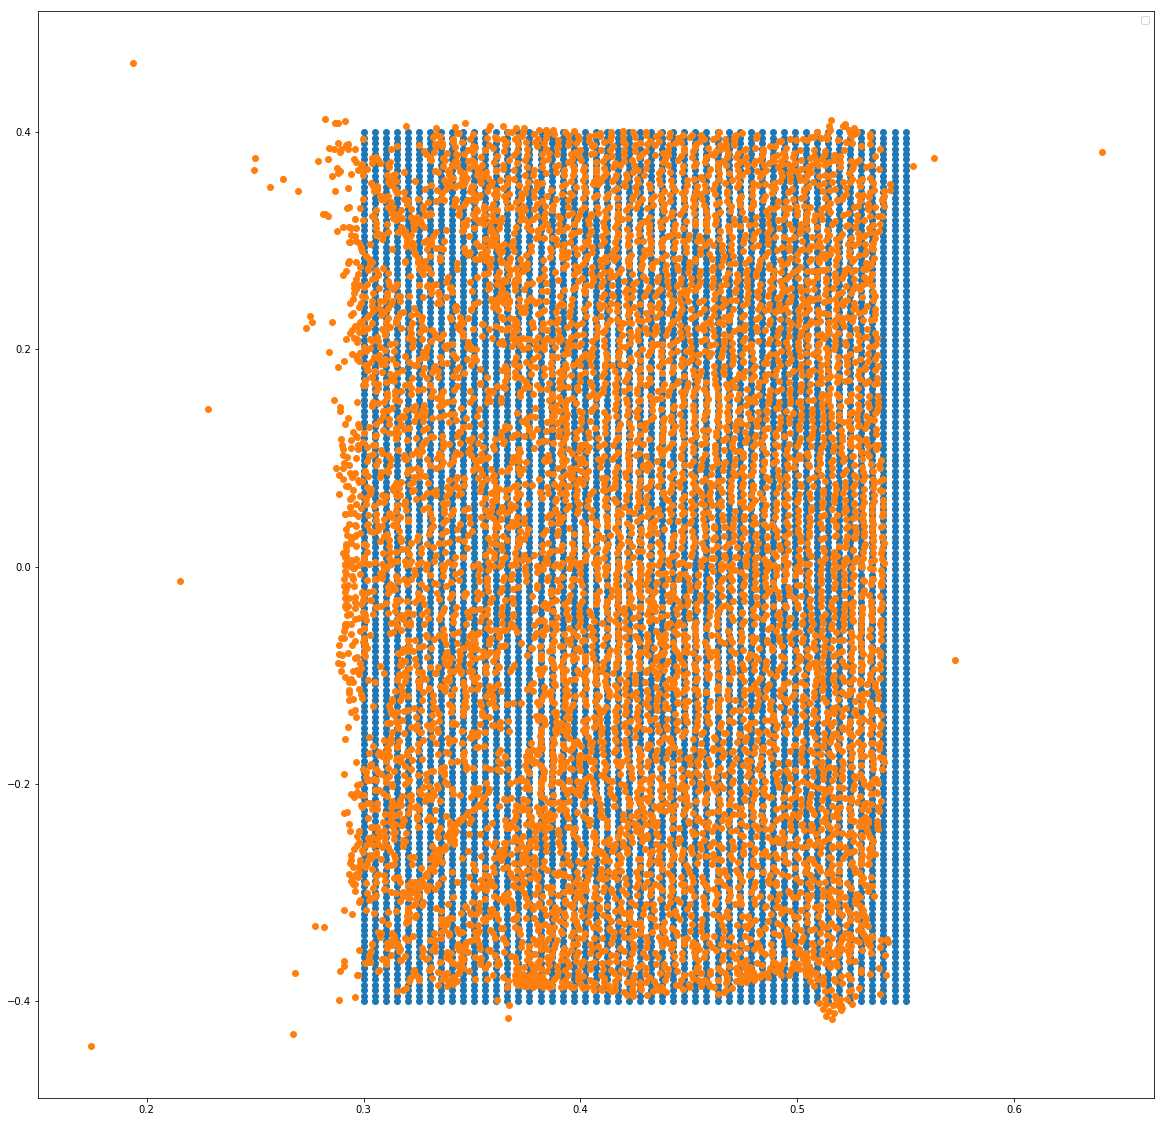

In [155]:
# 'model_l_5_lr_0.001_iter_0.pth.tar'

end_poses, pose_results, latents, trajectories, recons = get_reconstruction_results(model, 5)

norms = np.linalg.norm(end_poses - pose_results, axis=1)
norms_mean = norms.mean()
print('Average Error', norms_mean)

plt.figure(figsize=(20, 20))
plt.scatter(end_poses[:,0], end_poses[:,1])
plt.scatter(pose_results[:,0], pose_results[:,1])
plt.legend('Reconstructed', 'Original')

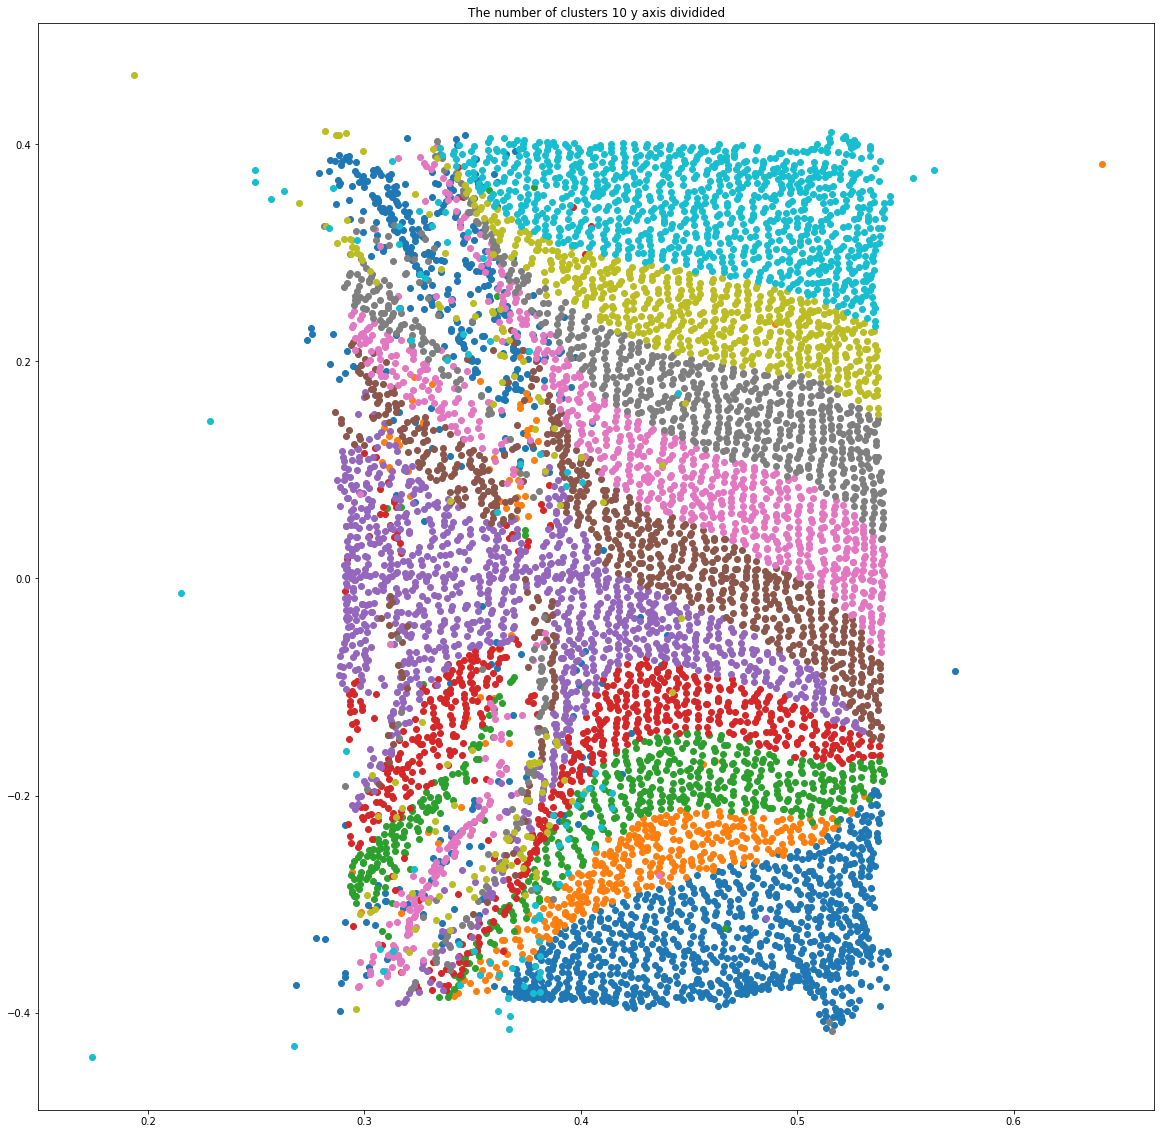

In [212]:
create_clusters(pose_results, latents, 10, False, True)

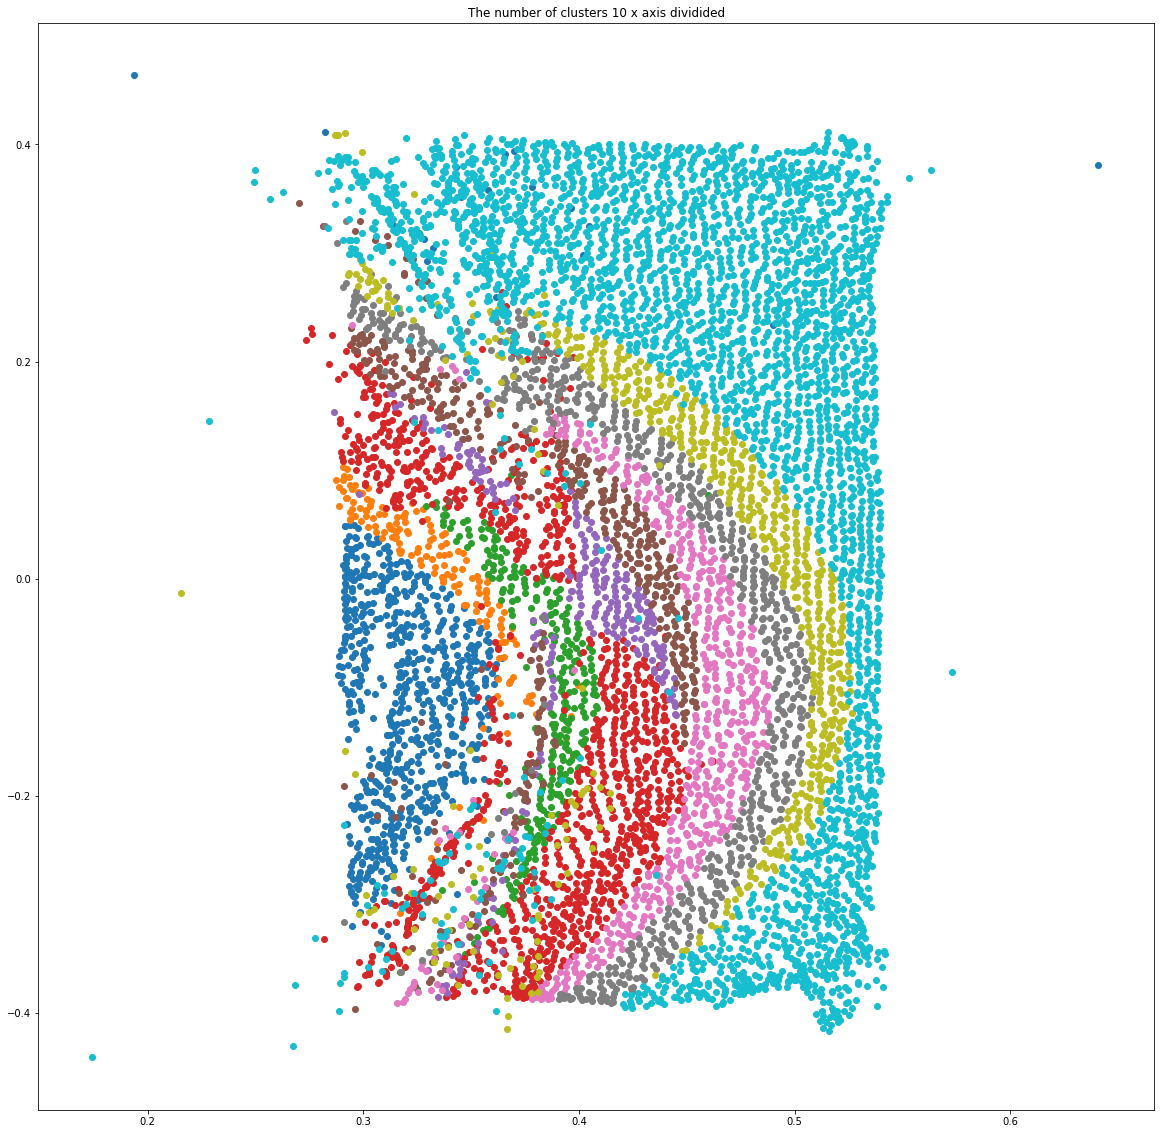

In [213]:
create_clusters(pose_results, latents, 10, True, False)

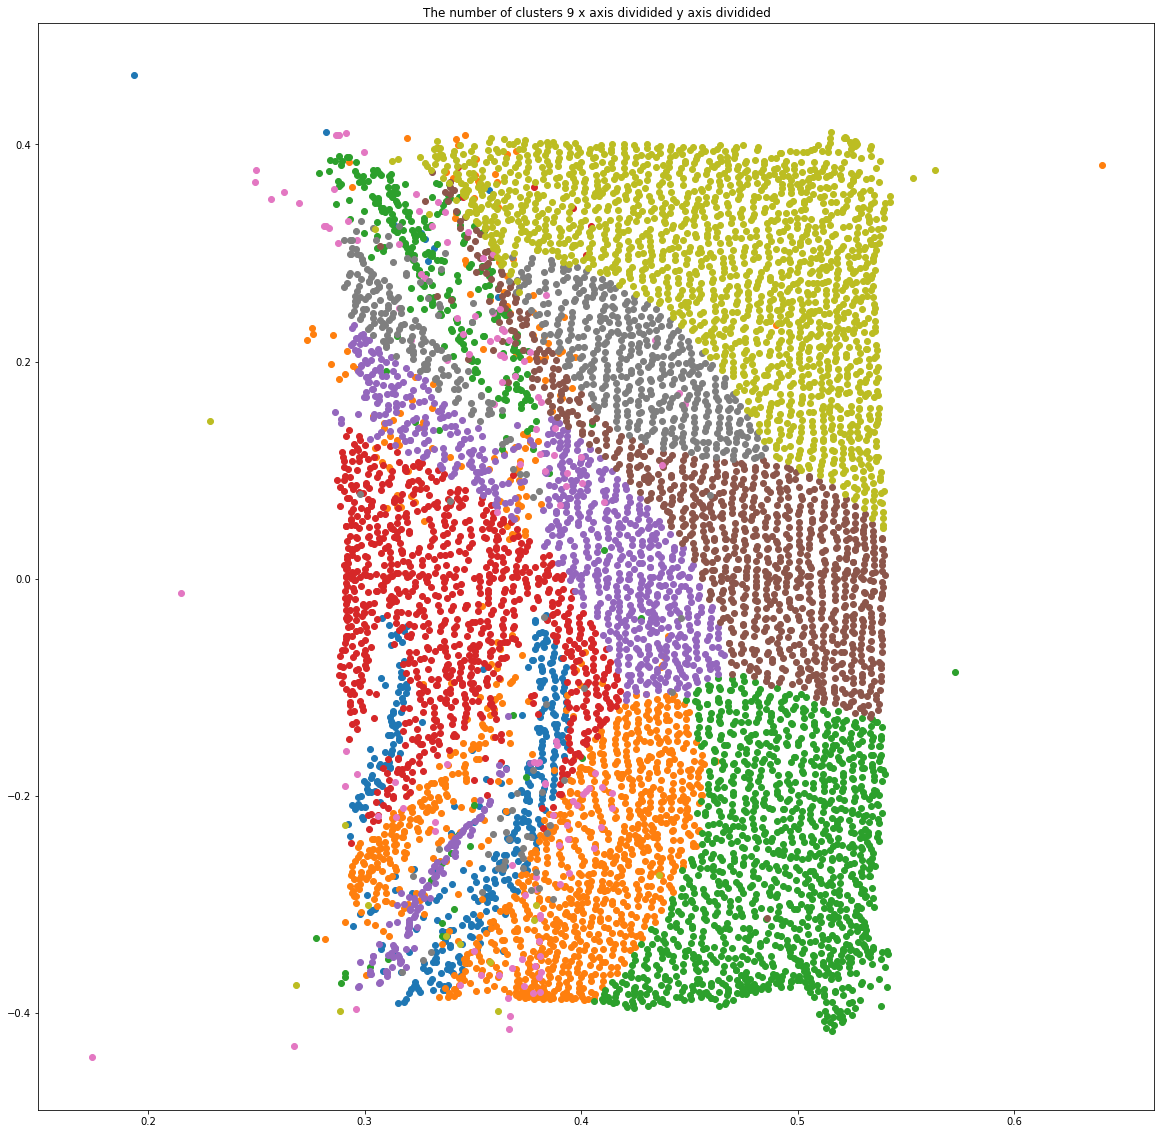

In [215]:
create_clusters(pose_results, latents, 3, True, True)

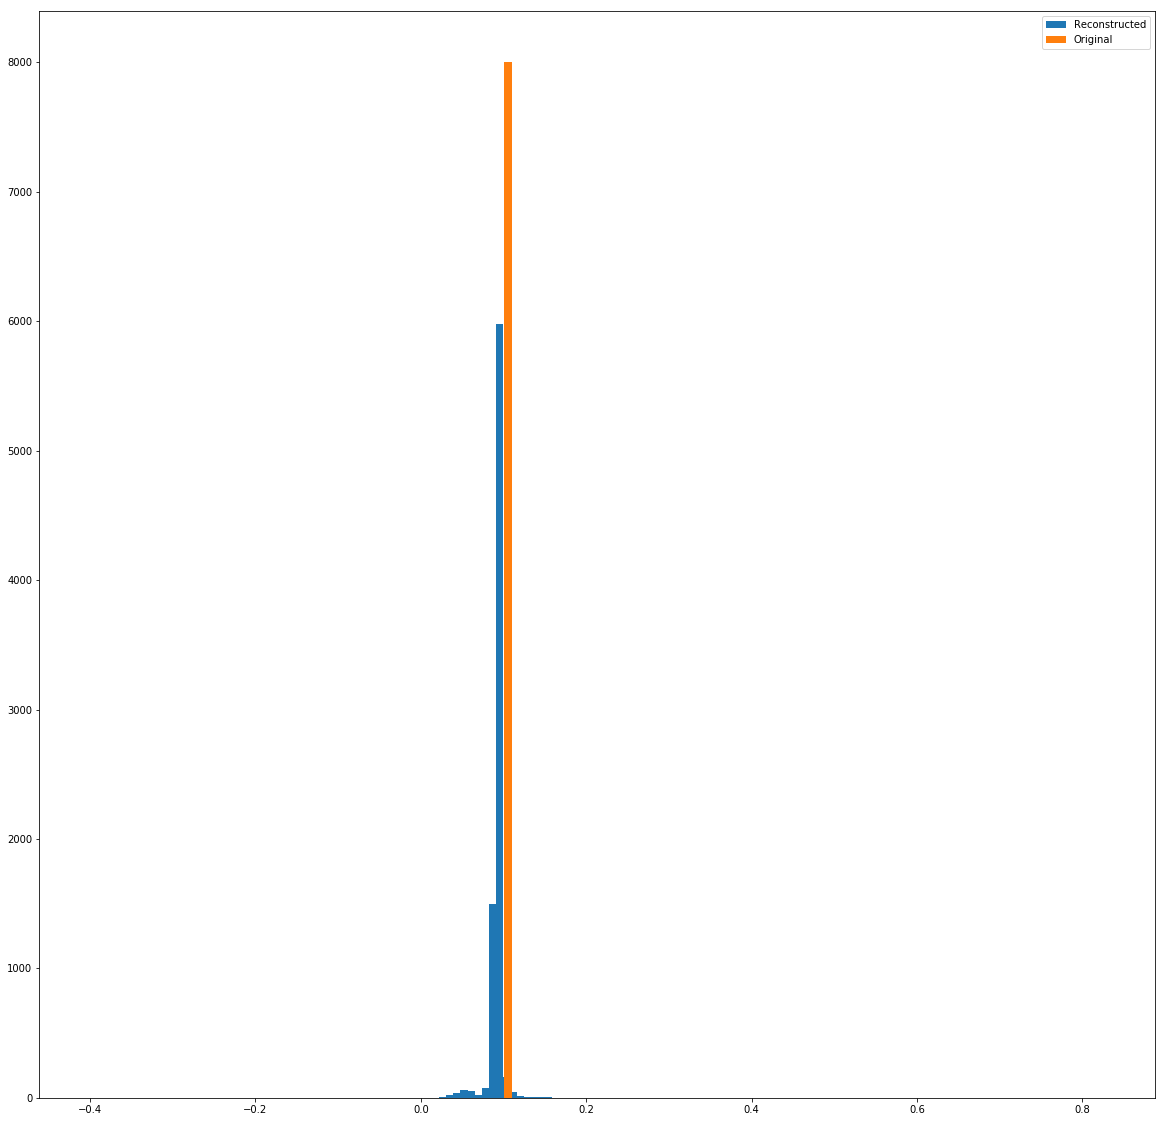

In [223]:
z_distribution(pose_results, end_poses)